## 할일
* see how linked playlists are by seeing how many songs in them are the same (make heatmap)
* get more ideas from gemini
* get on to the recommendation part

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_json("./Spotify Data #2/Playlist1.json")

In [2]:
playList = []
for p in df.playlists:
    playList.append(p)

In [3]:
df_dict = {}
for p in playList:
    df_dict[p["name"]] = pd.DataFrame(p["items"])

In [4]:
try:
    for p in df_dict:
        if "trackName" not in df_dict[p]:
            del(df_dict[p])
except:
    pass

In [5]:
for p in df_dict:
    df_dict[p]["trackArtist"] = df_dict[p]["trackName"] + " - " + df_dict[p]["artistName"]

`Aaru` playlist is empty, so i will be reomving that playlist

In [6]:
df_dict.keys()

dict_keys(['날이 좋아서, 날이 좋지 않아서', "곰's top tracks ", '천천히: 슬픔', '봄:공부', '쿵쿵쿵: 공부', 'भजन', '차:천천히', 'ਯਾਰ ਅਣਮੁੱਲੇ', 'My playlist #34', 'My playlist #33', '꿈', '쿵쿵쿵', '새', '봄', '홉', '기타 와 피아노', '최선 OST', 'Done For Me 처럼', '愛해', 'R&B', '7잉', '천천히', '6월', '5월', '차', '4월', '3월', '2월', '1월', '12월', '11월', '10월', '9월', '자장가', '여름', '( ◜‿◝ )♡', '사극'])

In [7]:
l = len(df_dict["My playlist #33"])
print(f"length of \"My playlist #33\" is {l}")
howmany = {}
for p in df_dict:
    if p == "My playlist #33":
        continue
    s = (set(df_dict['My playlist #33']["trackArtist"].values) & set(df_dict[p]["trackArtist"].values))
    if len(s)!=0:
        print(f"intersection with {p} has {len(s)} tracks:")
        print(s)
        howmany[p] = len(s)
    else:
        print(f"intersection with {p} is empty.")

length of "My playlist #33" is 84
intersection with 날이 좋아서, 날이 좋지 않아서 has 15 tracks:
{'Beautiful World - Da Capo Version - Hikaru Utada', 'The Happiest Girl - BLACKPINK', 'Sweet Night - V', 'Christmas Tree - V', 'Your eyes tell - BTS', '再会 (produced by Ayase) - LiSA', 'Imagination - Shawn Mendes', 'Promise - Jimin', 'Good Day - MeloMance', "You're Cold - HEIZE", 'Euphoria - BTS', '사랑해요 - Kim Hyoungsup', 'Flower - Yoon Mirae', 'Still With You - Jung Kook', 'eight(Prod.&Feat. SUGA of BTS) - IU'}
intersection with 곰's top tracks  has 13 tracks:
{'Sweet Night - V', 'Christmas Tree - V', 'Slightly Tipsy (She is My Type♡ X SANDEUL) - Sandeul', 'Your eyes tell - BTS', 'Stay With Me - CHANYEOL', 'Imagination - Shawn Mendes', 'Through the Night - IU', 'Midnight - HEIZE', 'Is it me? - BAEKHYUN', 'I Will Go To You Like the First Snow - AILEE', 'Euphoria - BTS', 'Like Water - WENDY', 'eight(Prod.&Feat. SUGA of BTS) - IU'}
intersection with 천천히: 슬픔 is empty.
intersection with 봄:공부 has 1 tracks:
{"Y

In [8]:
import matplotlib.font_manager as fm
from matplotlib import cm
cmap = cm.bwr

font_path = fm.findfont("Malgun Gothic")
malgun_font = fm.FontProperties(fname=font_path, size=28)

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [116]:
def plot(dic, text):
    sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))

    plt.figure(figsize=(18,18))
    plt.barh(y=list(sorted_dic.keys()),
            width=list(sorted_dic.values()),
            color="springgreen")

    plt.yticks(range(len(sorted_dic)),
              list(sorted_dic.keys()),
              fontproperties=malgun_font)

    plt.title(text, fontproperties=malgun_font)
    plt.bar_label(plt.gca().containers[0], fontproperties=malgun_font)
    plt.show()

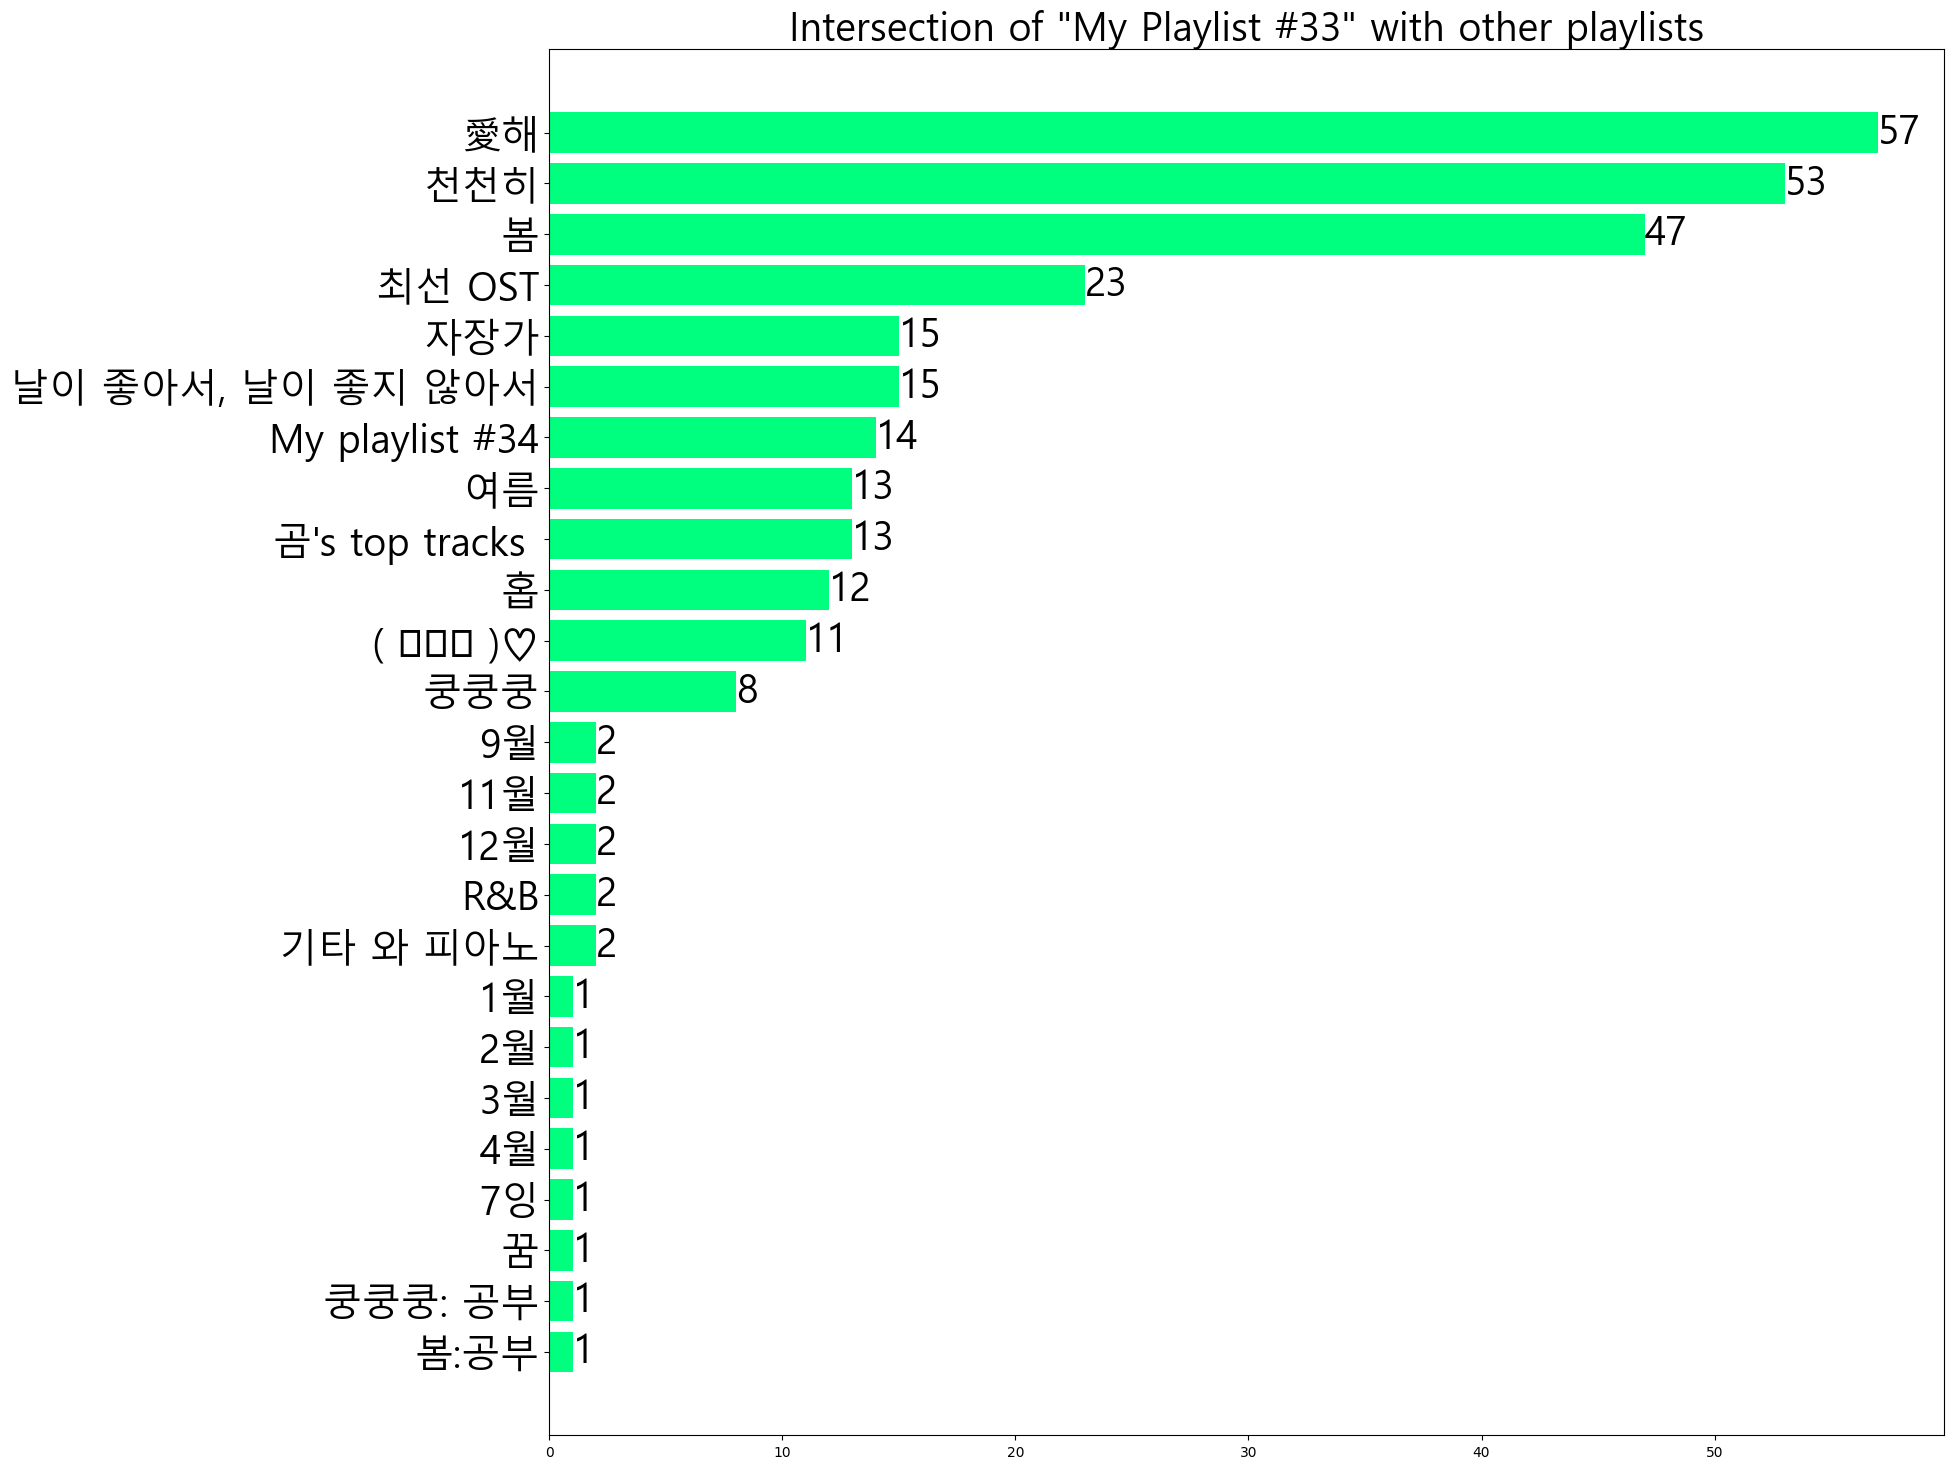

In [117]:
plot(howmany, "Intersection of \"My Playlist #33\" with other playlists")

## Analysis

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [13]:
cid = '9870d6fb6972486c99fc111c507422d4'
secret = '7e80619a4d6d40b59c9b7671f5804c19'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### we must clean the data first
remove nan values from trackUri<br>
podcasts in playlists have nan values, we shall clean them

In [14]:
for p in df_dict:
    for i in range(len(p)):
        if pd.isna(df_dict[p].loc[i, "trackUri"]):
            print(f"removed position {i} from {p}")

removed position 1 from 사극


nan values have been found in playlists `My playlist #33`, `2월`, `3월`, `사극`<br>
the above code seems not to be working, will have to remove these manually

In [15]:
df_dict["사극"].drop([1,2], inplace=True)
df_dict["사극"].reset_index(drop=True, inplace=True)
df_dict["My playlist #33"].drop([28], inplace=True)
df_dict["My playlist #33"].reset_index(drop=True, inplace=True)
df_dict["3월"].drop([2,4,18,19], inplace=True)
df_dict["3월"].reset_index(drop=True, inplace=True)
df_dict["2월"].drop([7], inplace=True)
df_dict["2월"].reset_index(drop=True, inplace=True)

In [73]:
%%time
features = {}
for p in df_dict:
    print(p)
    templist = []
    for i in range(0, len(df_dict[p]), 100):
        templist.extend(sp.audio_features(list(df_dict[p].trackUri.loc[i:i+99])))
    features[p] = templist

날이 좋아서, 날이 좋지 않아서
곰's top tracks 
천천히: 슬픔
봄:공부
쿵쿵쿵: 공부
भजन
차:천천히
ਯਾਰ ਅਣਮੁੱਲੇ
My playlist #34
My playlist #33
꿈
쿵쿵쿵
새
봄
홉
기타 와 피아노
최선 OST
Done For Me 처럼
愛해
R&B
7잉
천천히
6월
5월
차
4월
3월
2월
1월
12월
11월
10월
9월
자장가
여름
( ◜‿◝ )♡
사극
CPU times: total: 78.1 ms
Wall time: 18.6 s


In [74]:
len(features["봄"])

621

i have a dict with a list of dicts and i want dataframes for each list with the internal dictionaries as rows

In [76]:
features_df = {}
for name, tracks in features.items():
    features_df[name] = pd.DataFrame(tracks)

In [77]:
playlist_dict = {}
for p in df_dict:
    playlist_dict[p] = pd.concat([df_dict[p], features_df[p]], axis=1)

In [78]:
modified_keys = [key.replace(":", "-") for key in playlist_dict.keys()]
playlist_dict = dict(zip(modified_keys, playlist_dict.values()))

In [79]:
# for name, d in playlist_dict.items():
#     d.to_excel(f"{name}.xlsx")

In [105]:
for p in ["6월","5월","4월","3월","2월","1월","12월","11월","10월","9월","최선 OST", "봄-공부", "새", "My playlist #34"]:
    del(playlist_dict[p])

KeyError: '6월'

In [123]:
duration = {}
for p in playlist_dict:
    duration[p] = (playlist_dict[p].duration_ms.sum())/(60*1000)

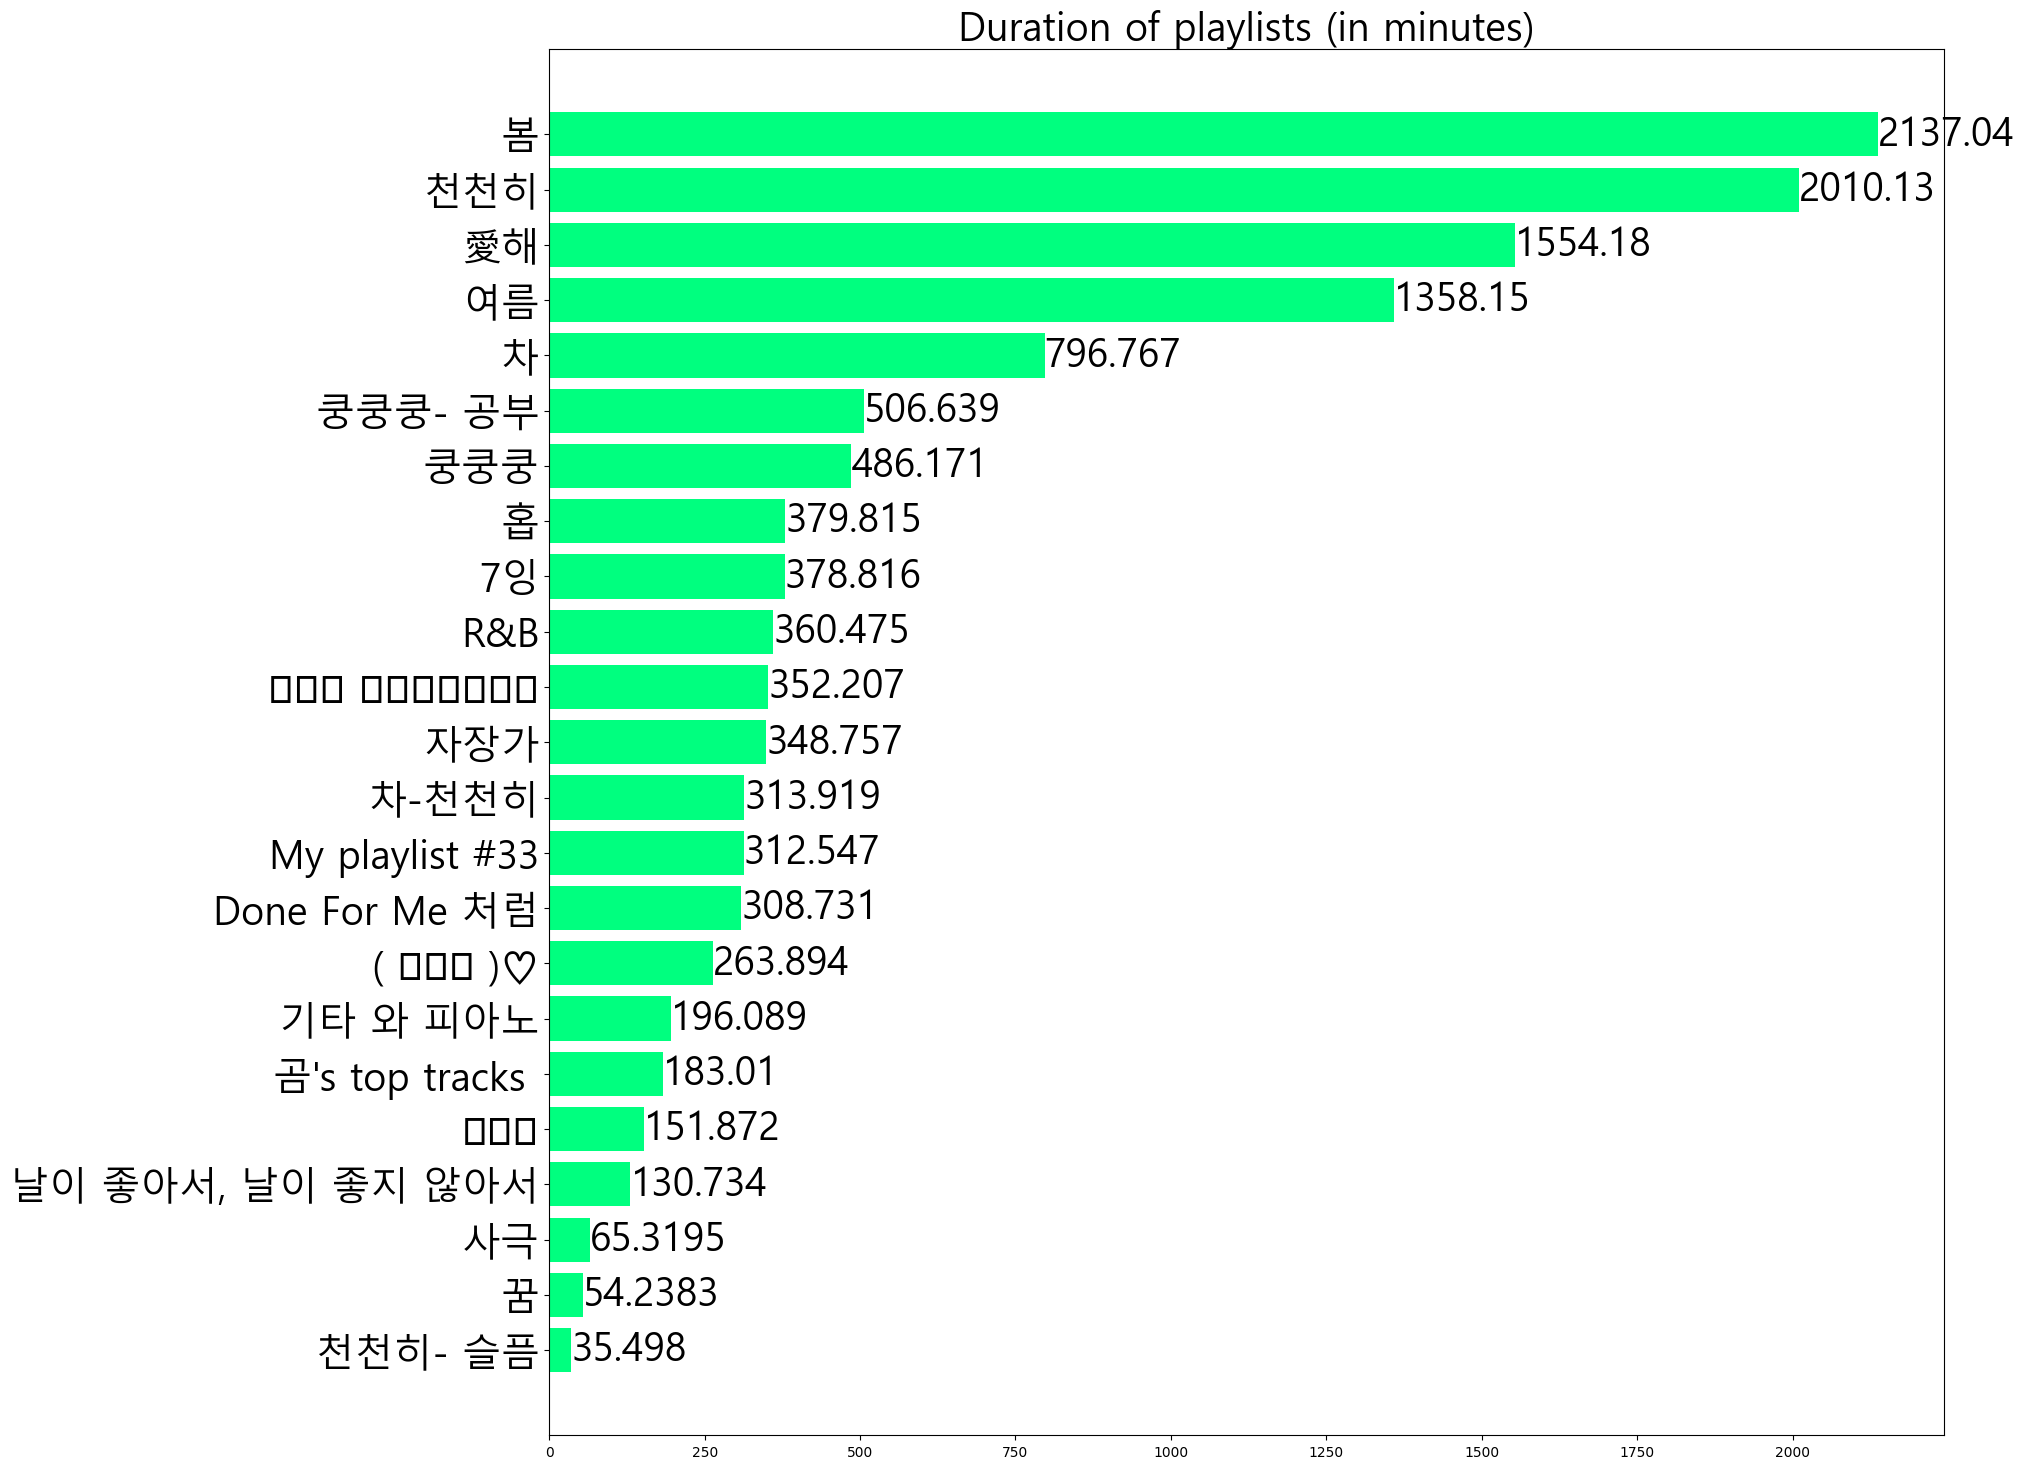

In [124]:
plot(duration, "Duration of playlists (in minutes)")

In [125]:
avgduration = {}
for p in playlist_dict:
    avgduration[p] = ((playlist_dict[p].duration_ms.sum())/(60*1000))/(len(playlist_dict[p]))

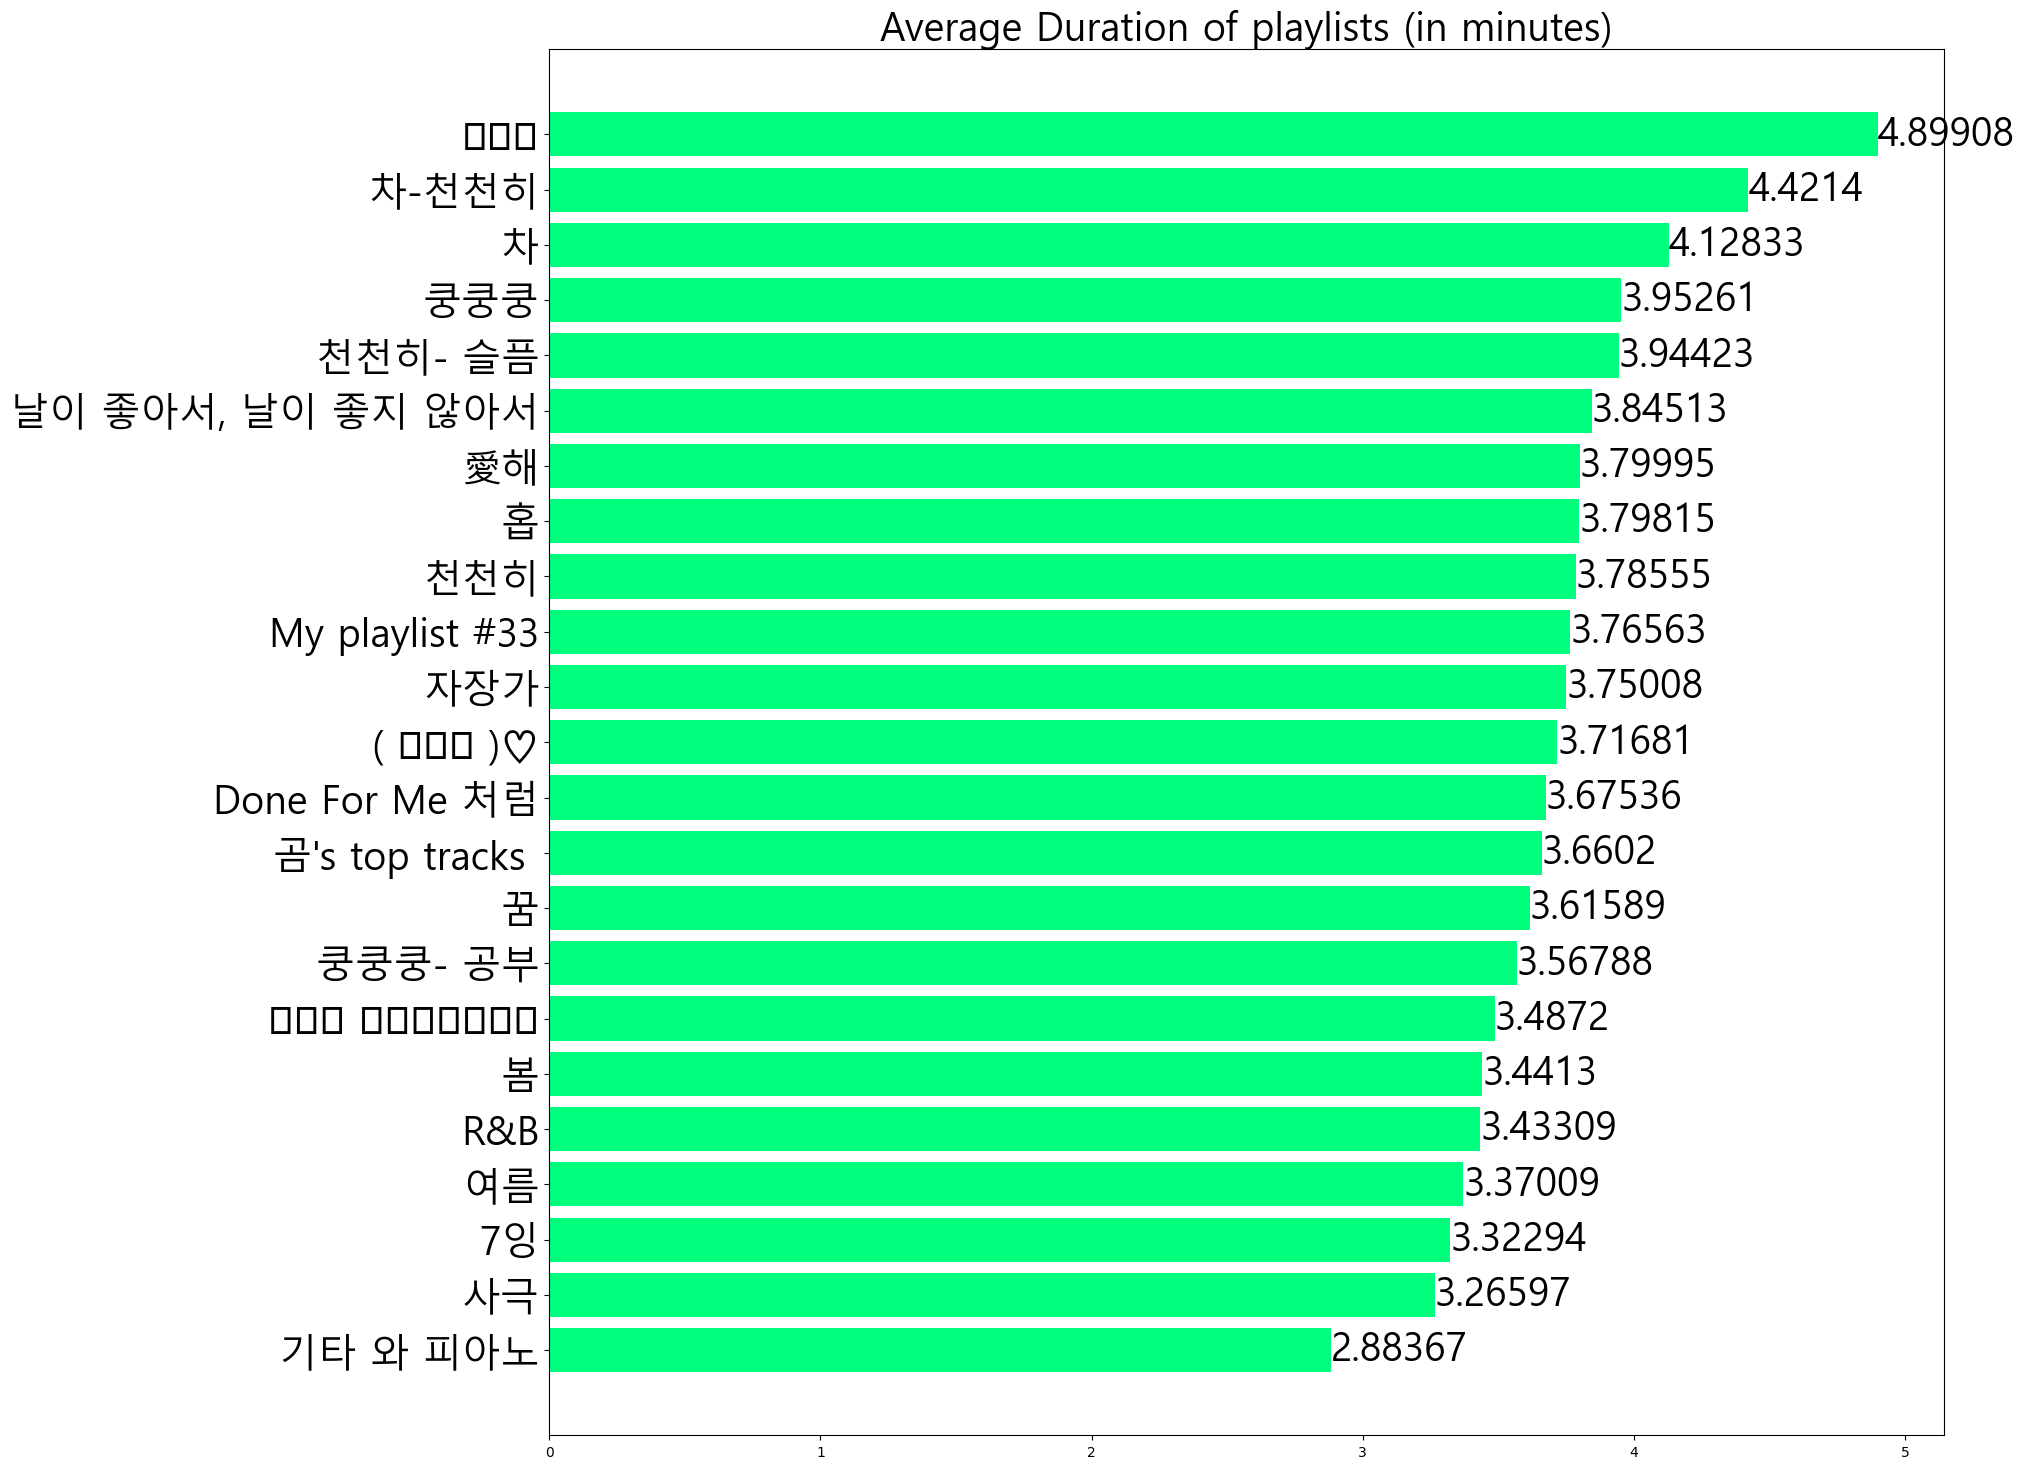

In [126]:
plot(avgduration, "Average Duration of playlists (in minutes)")

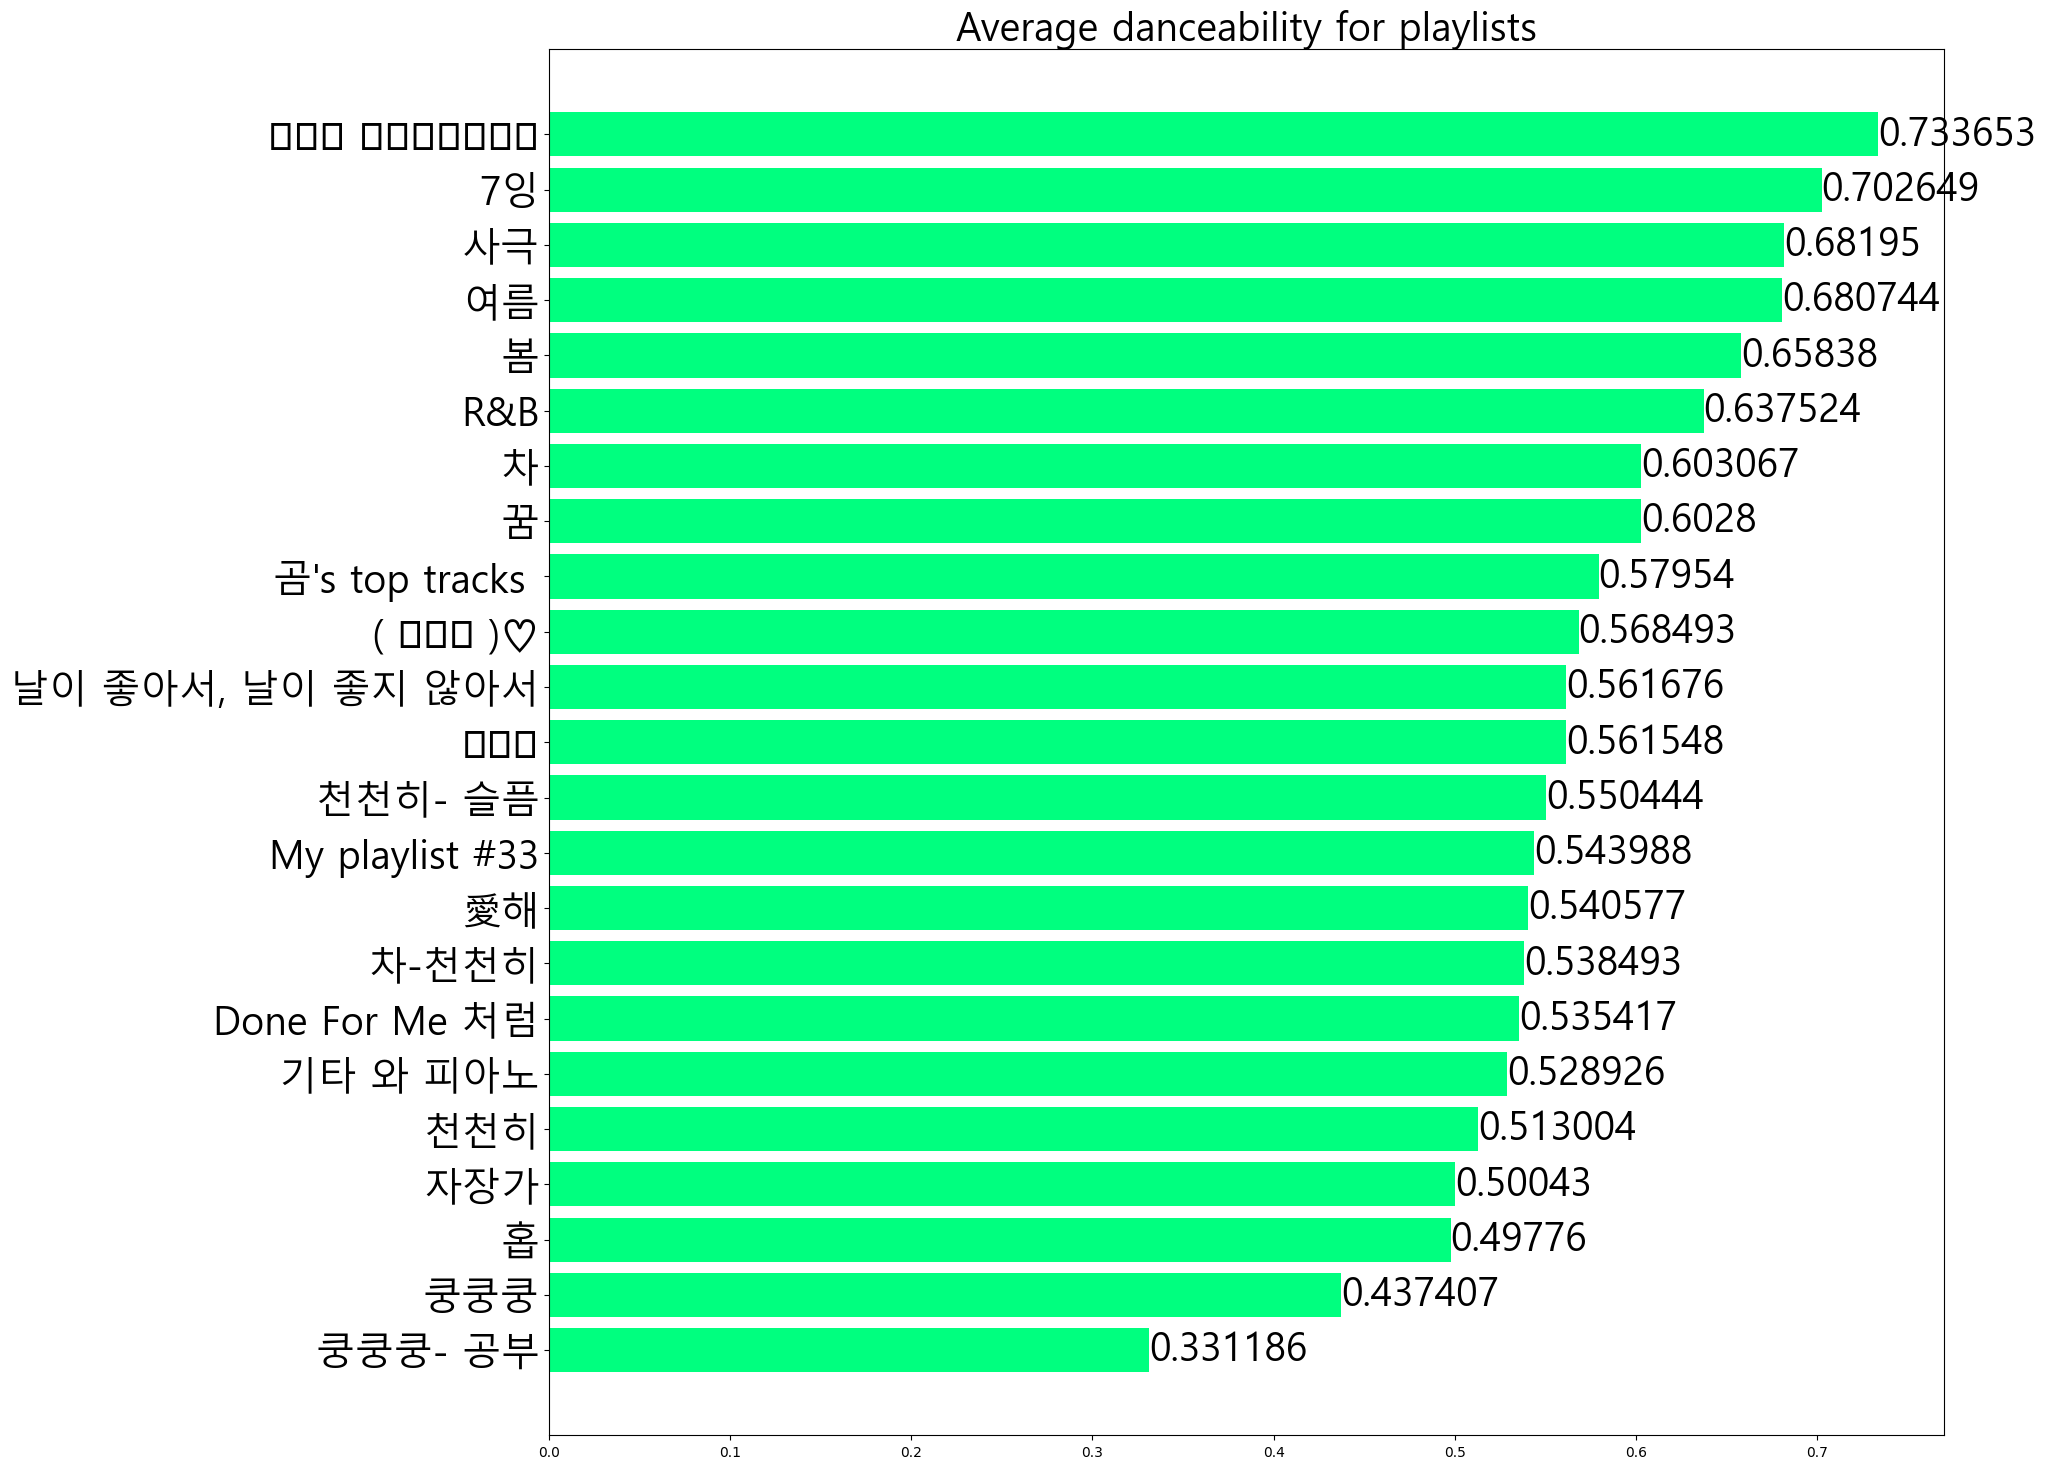

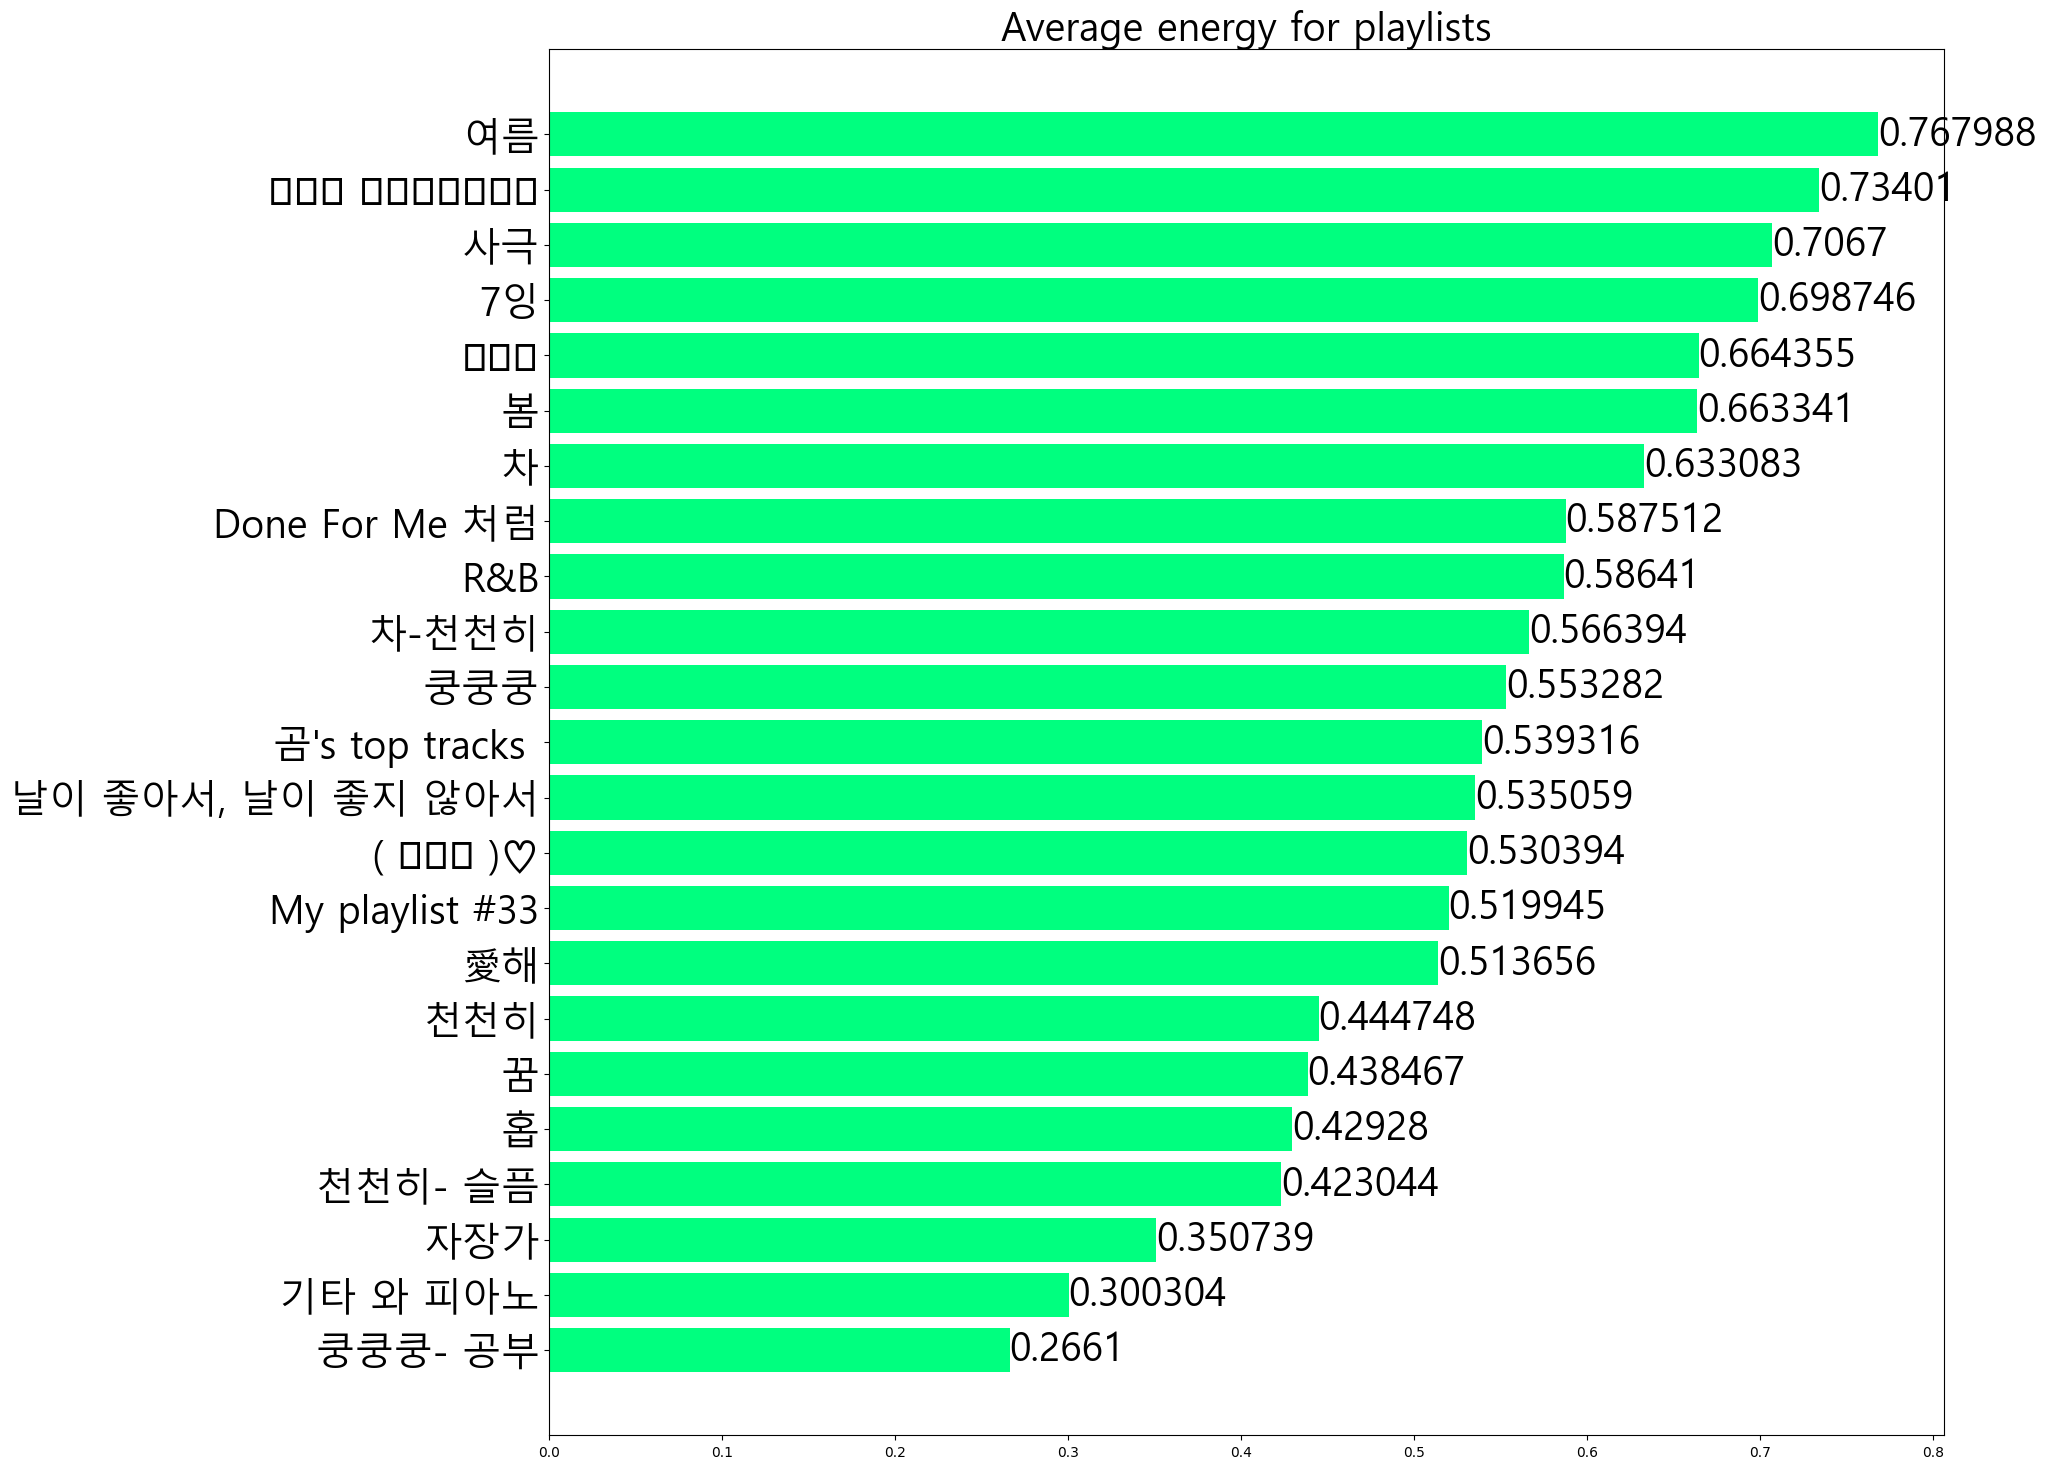

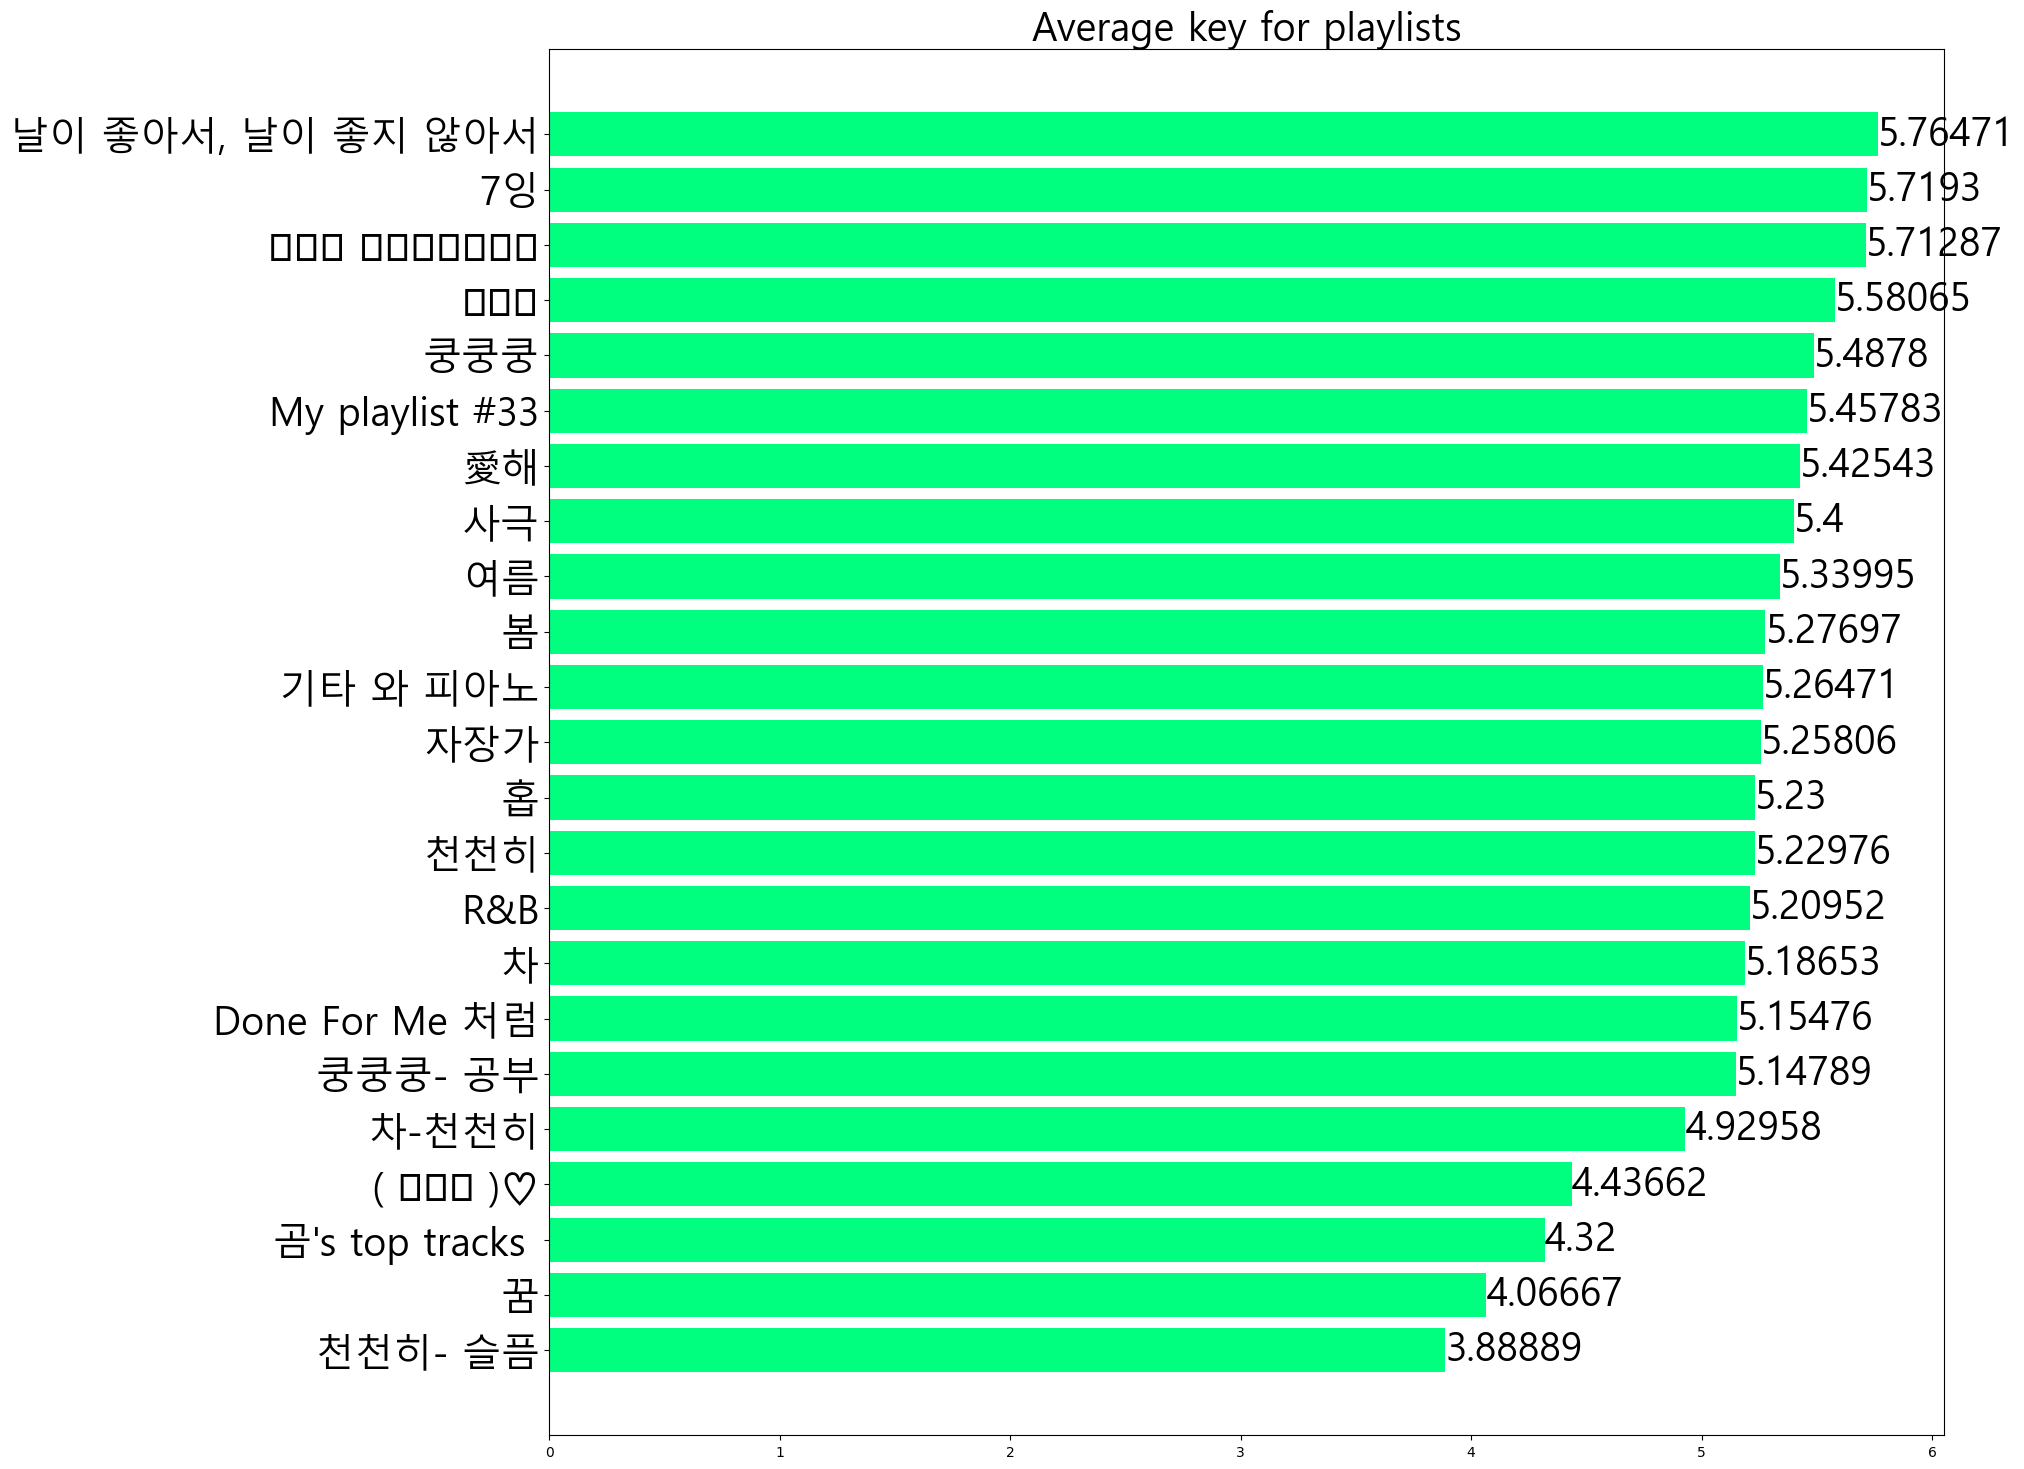

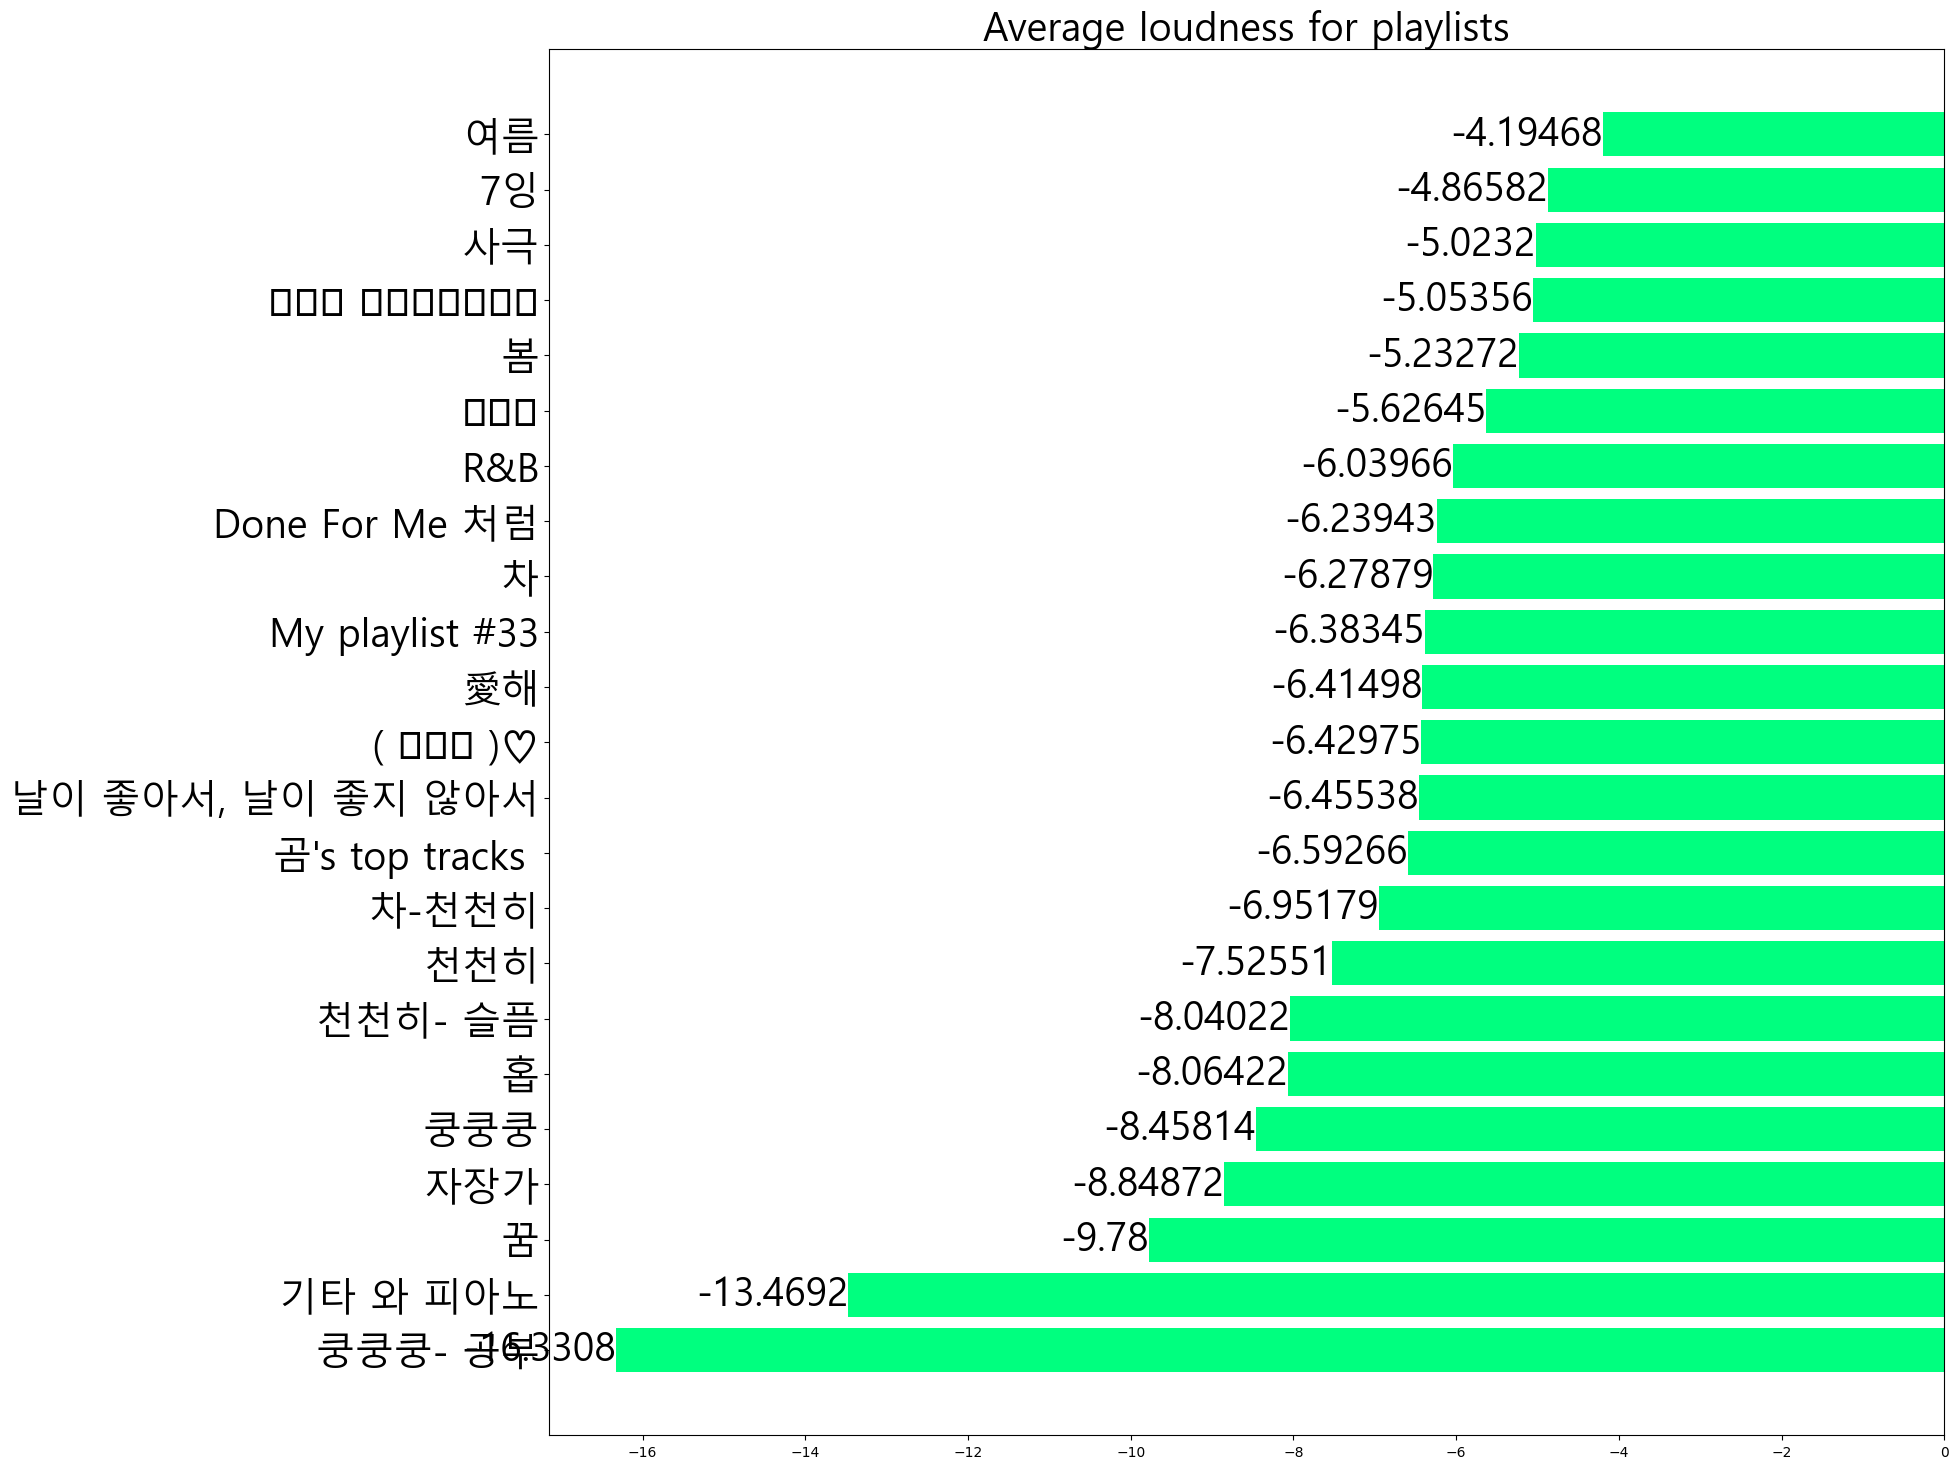

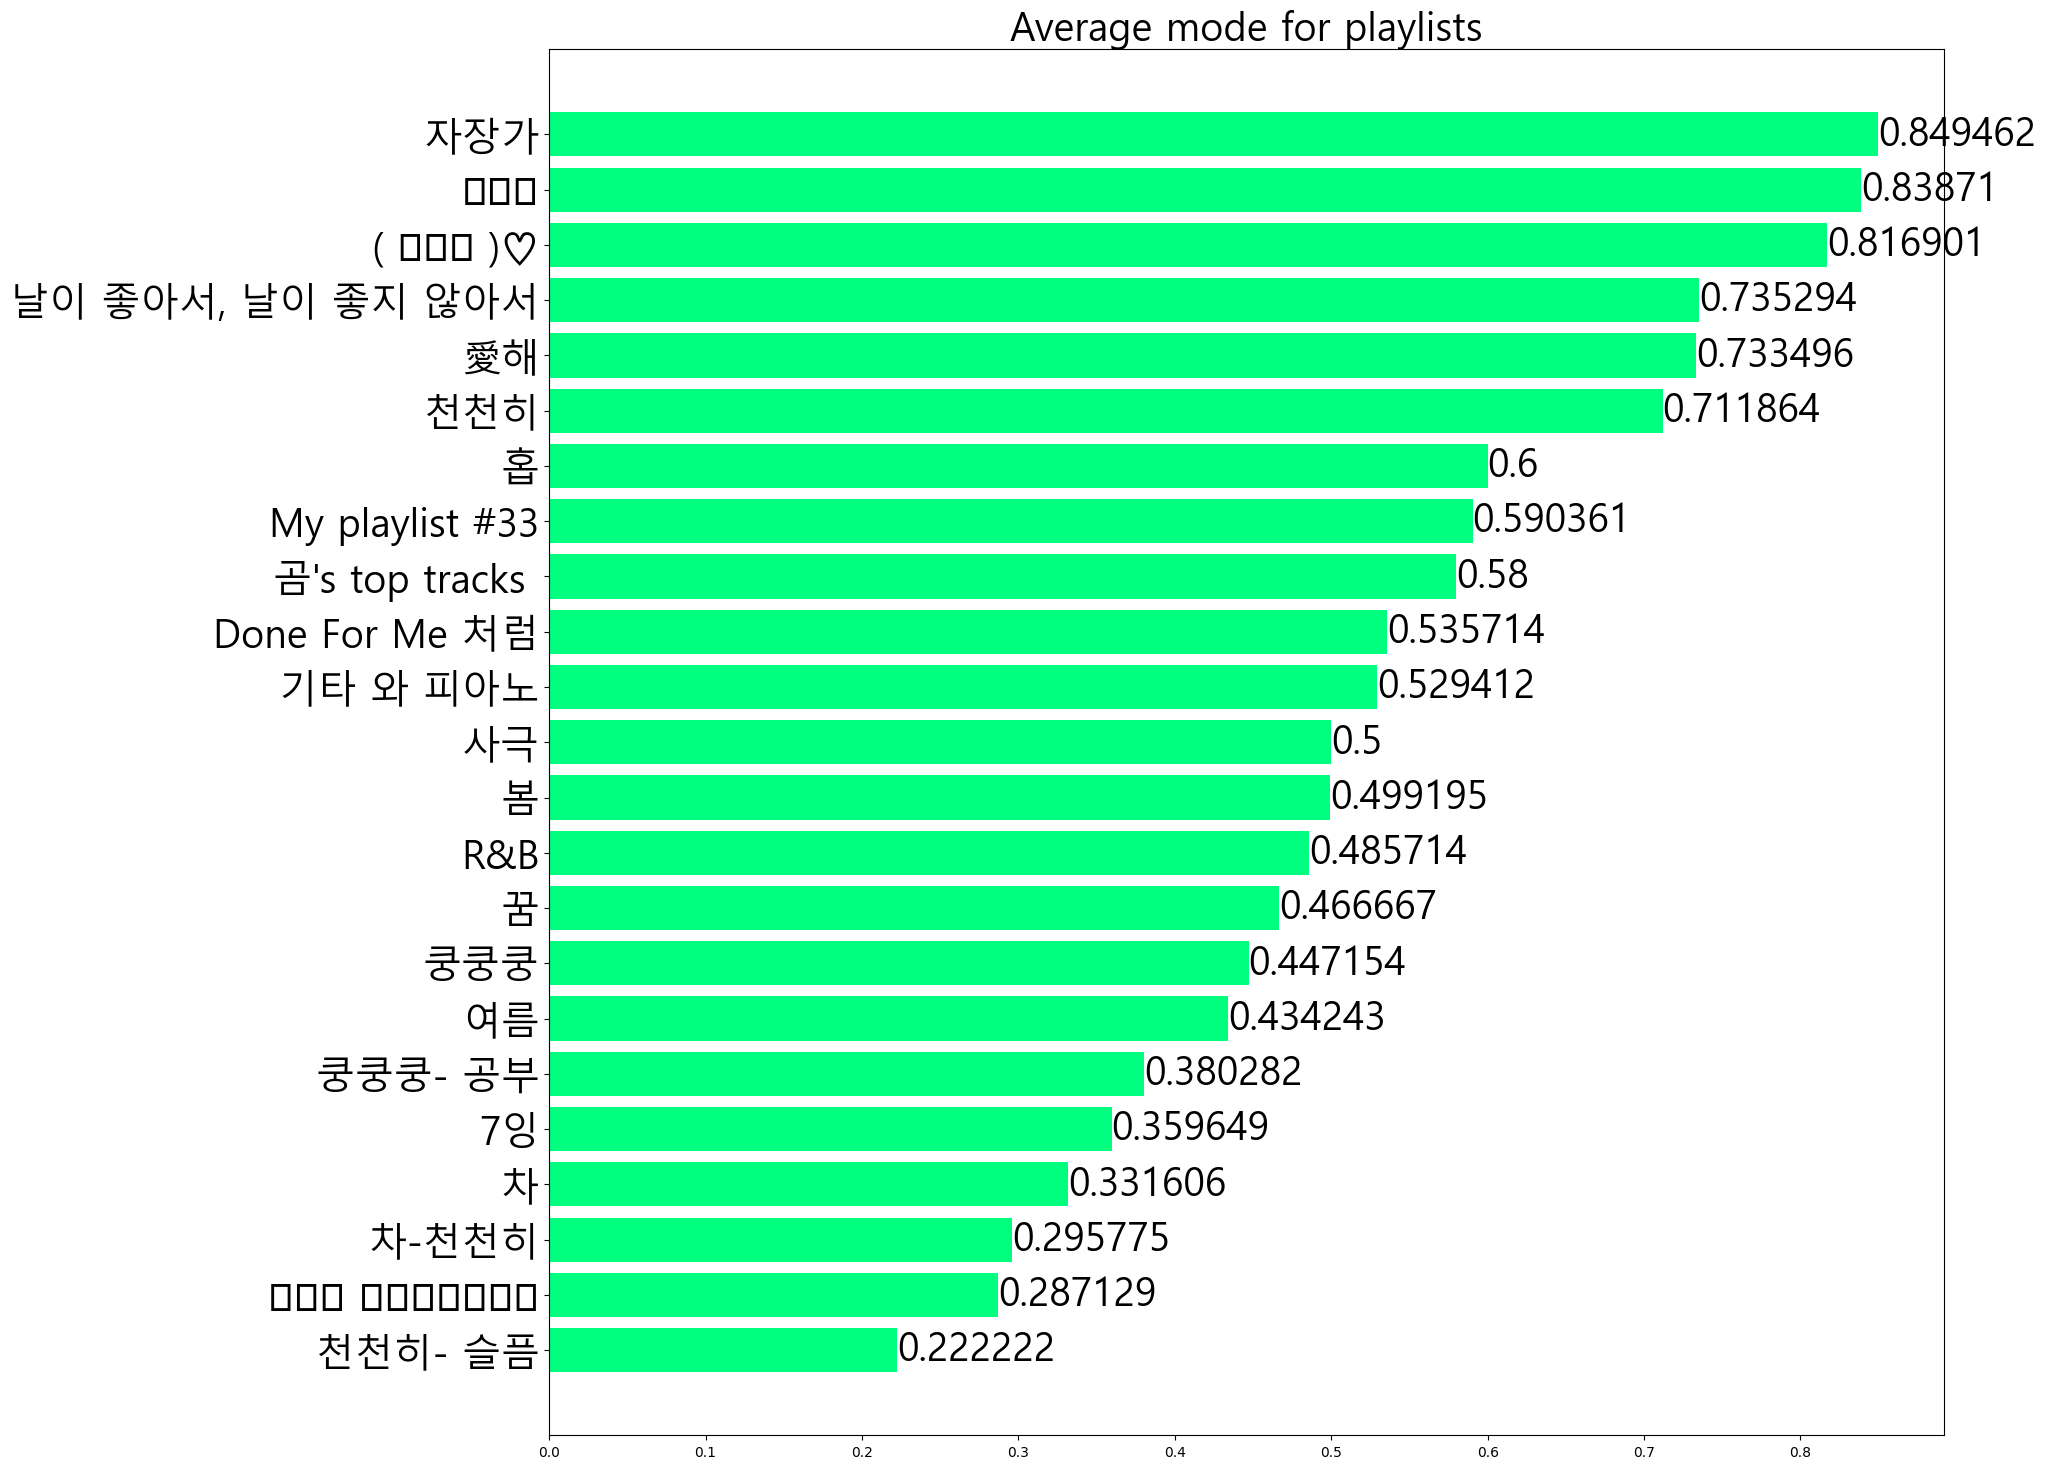

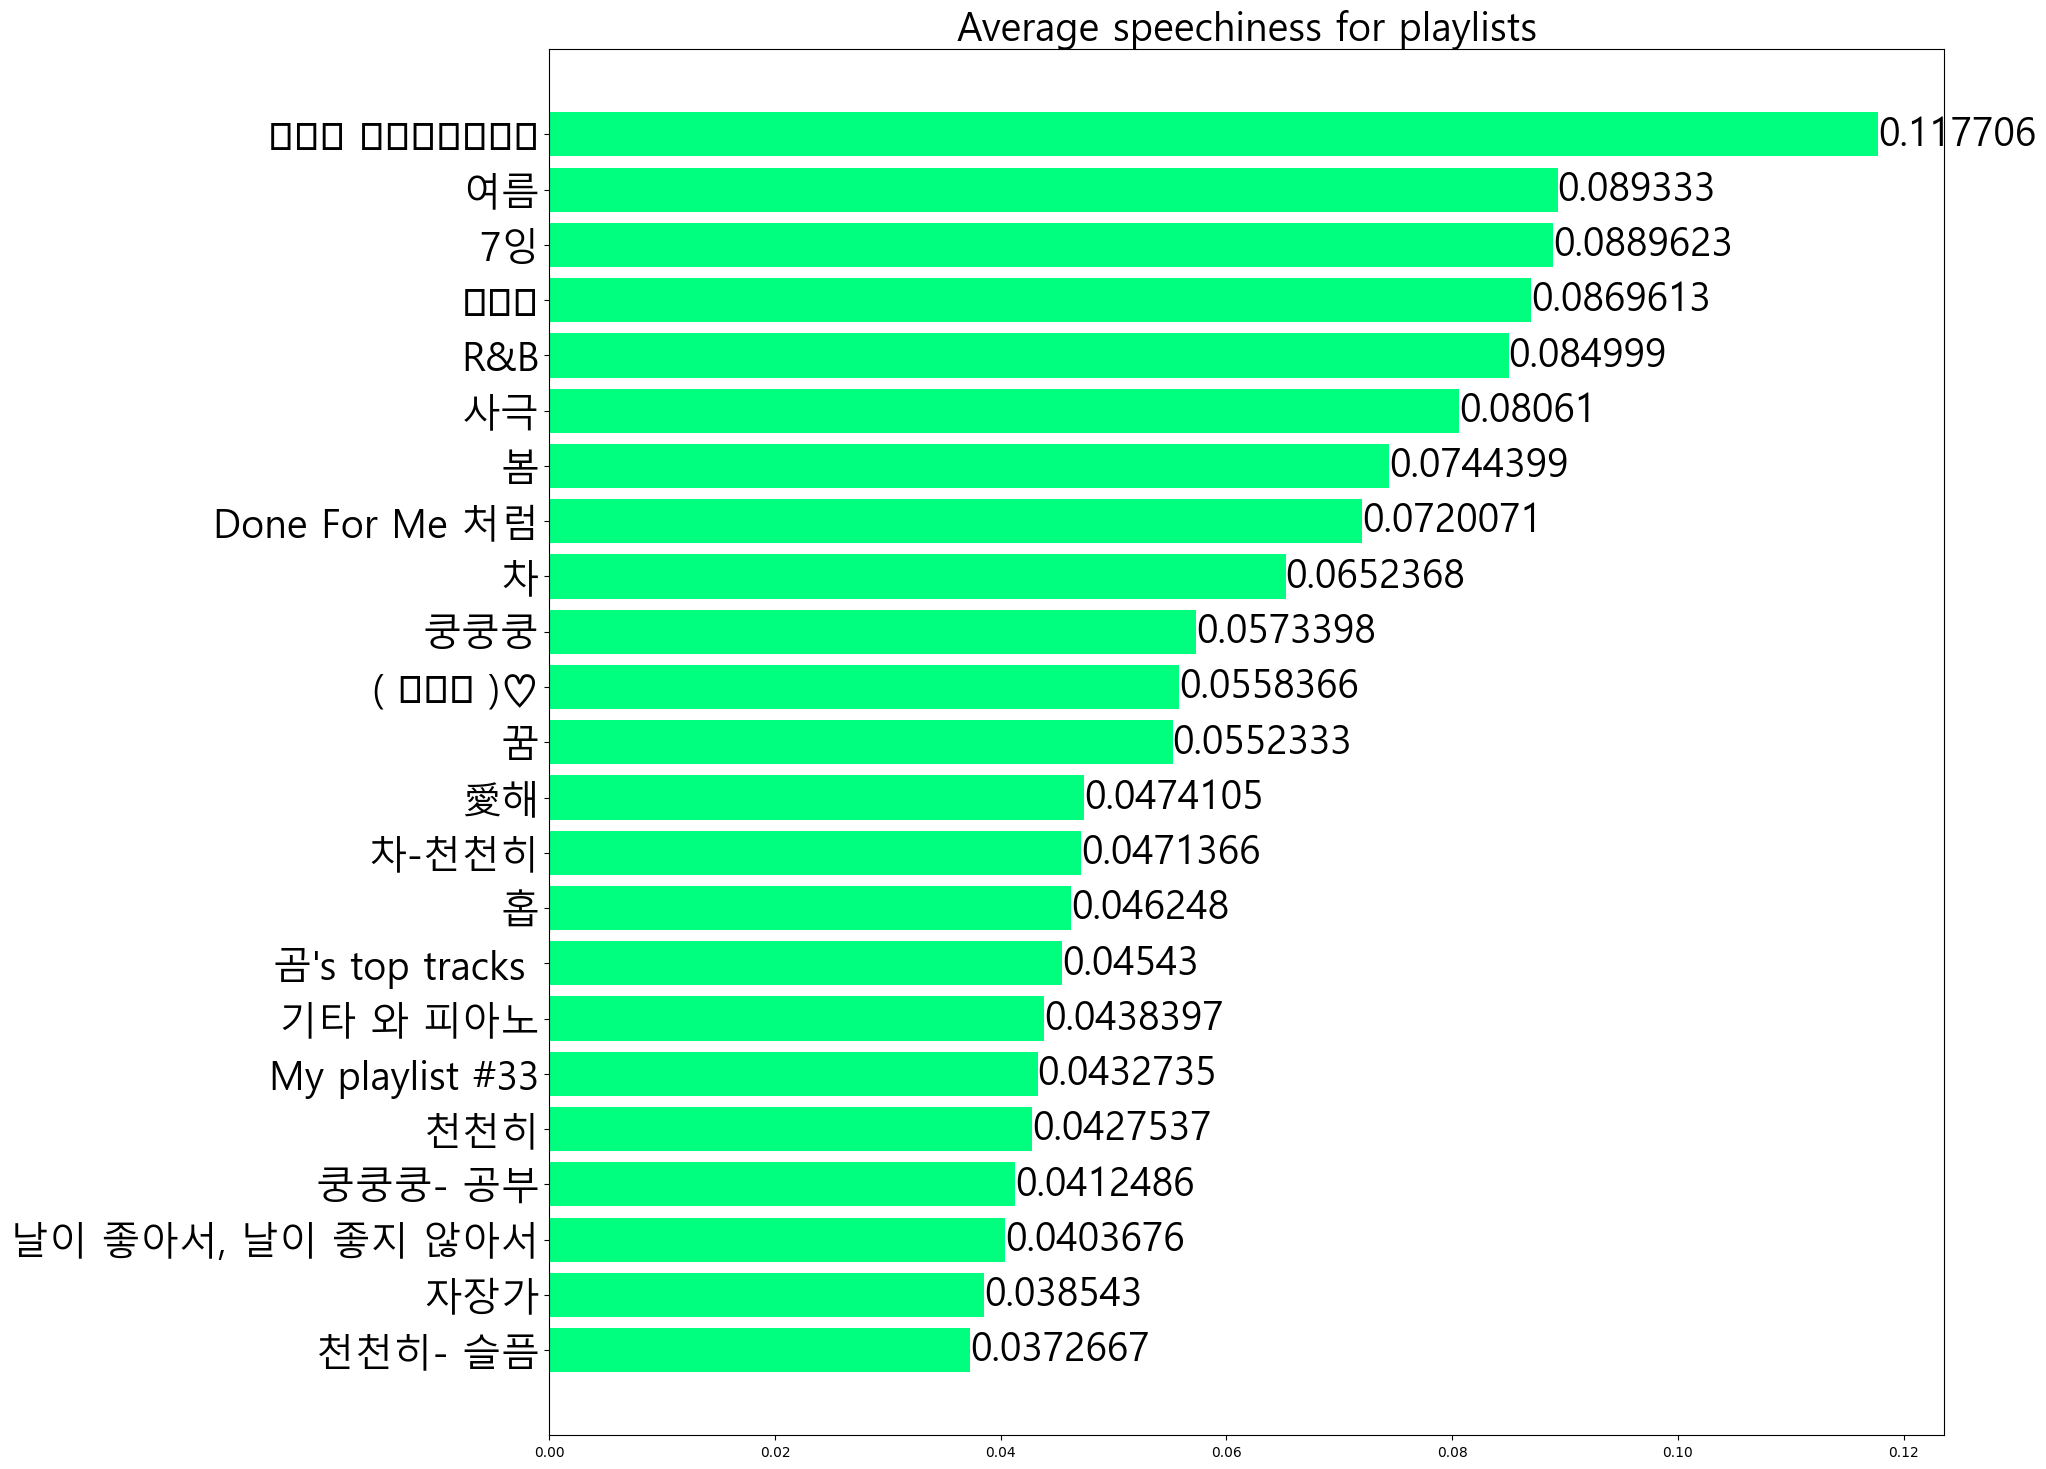

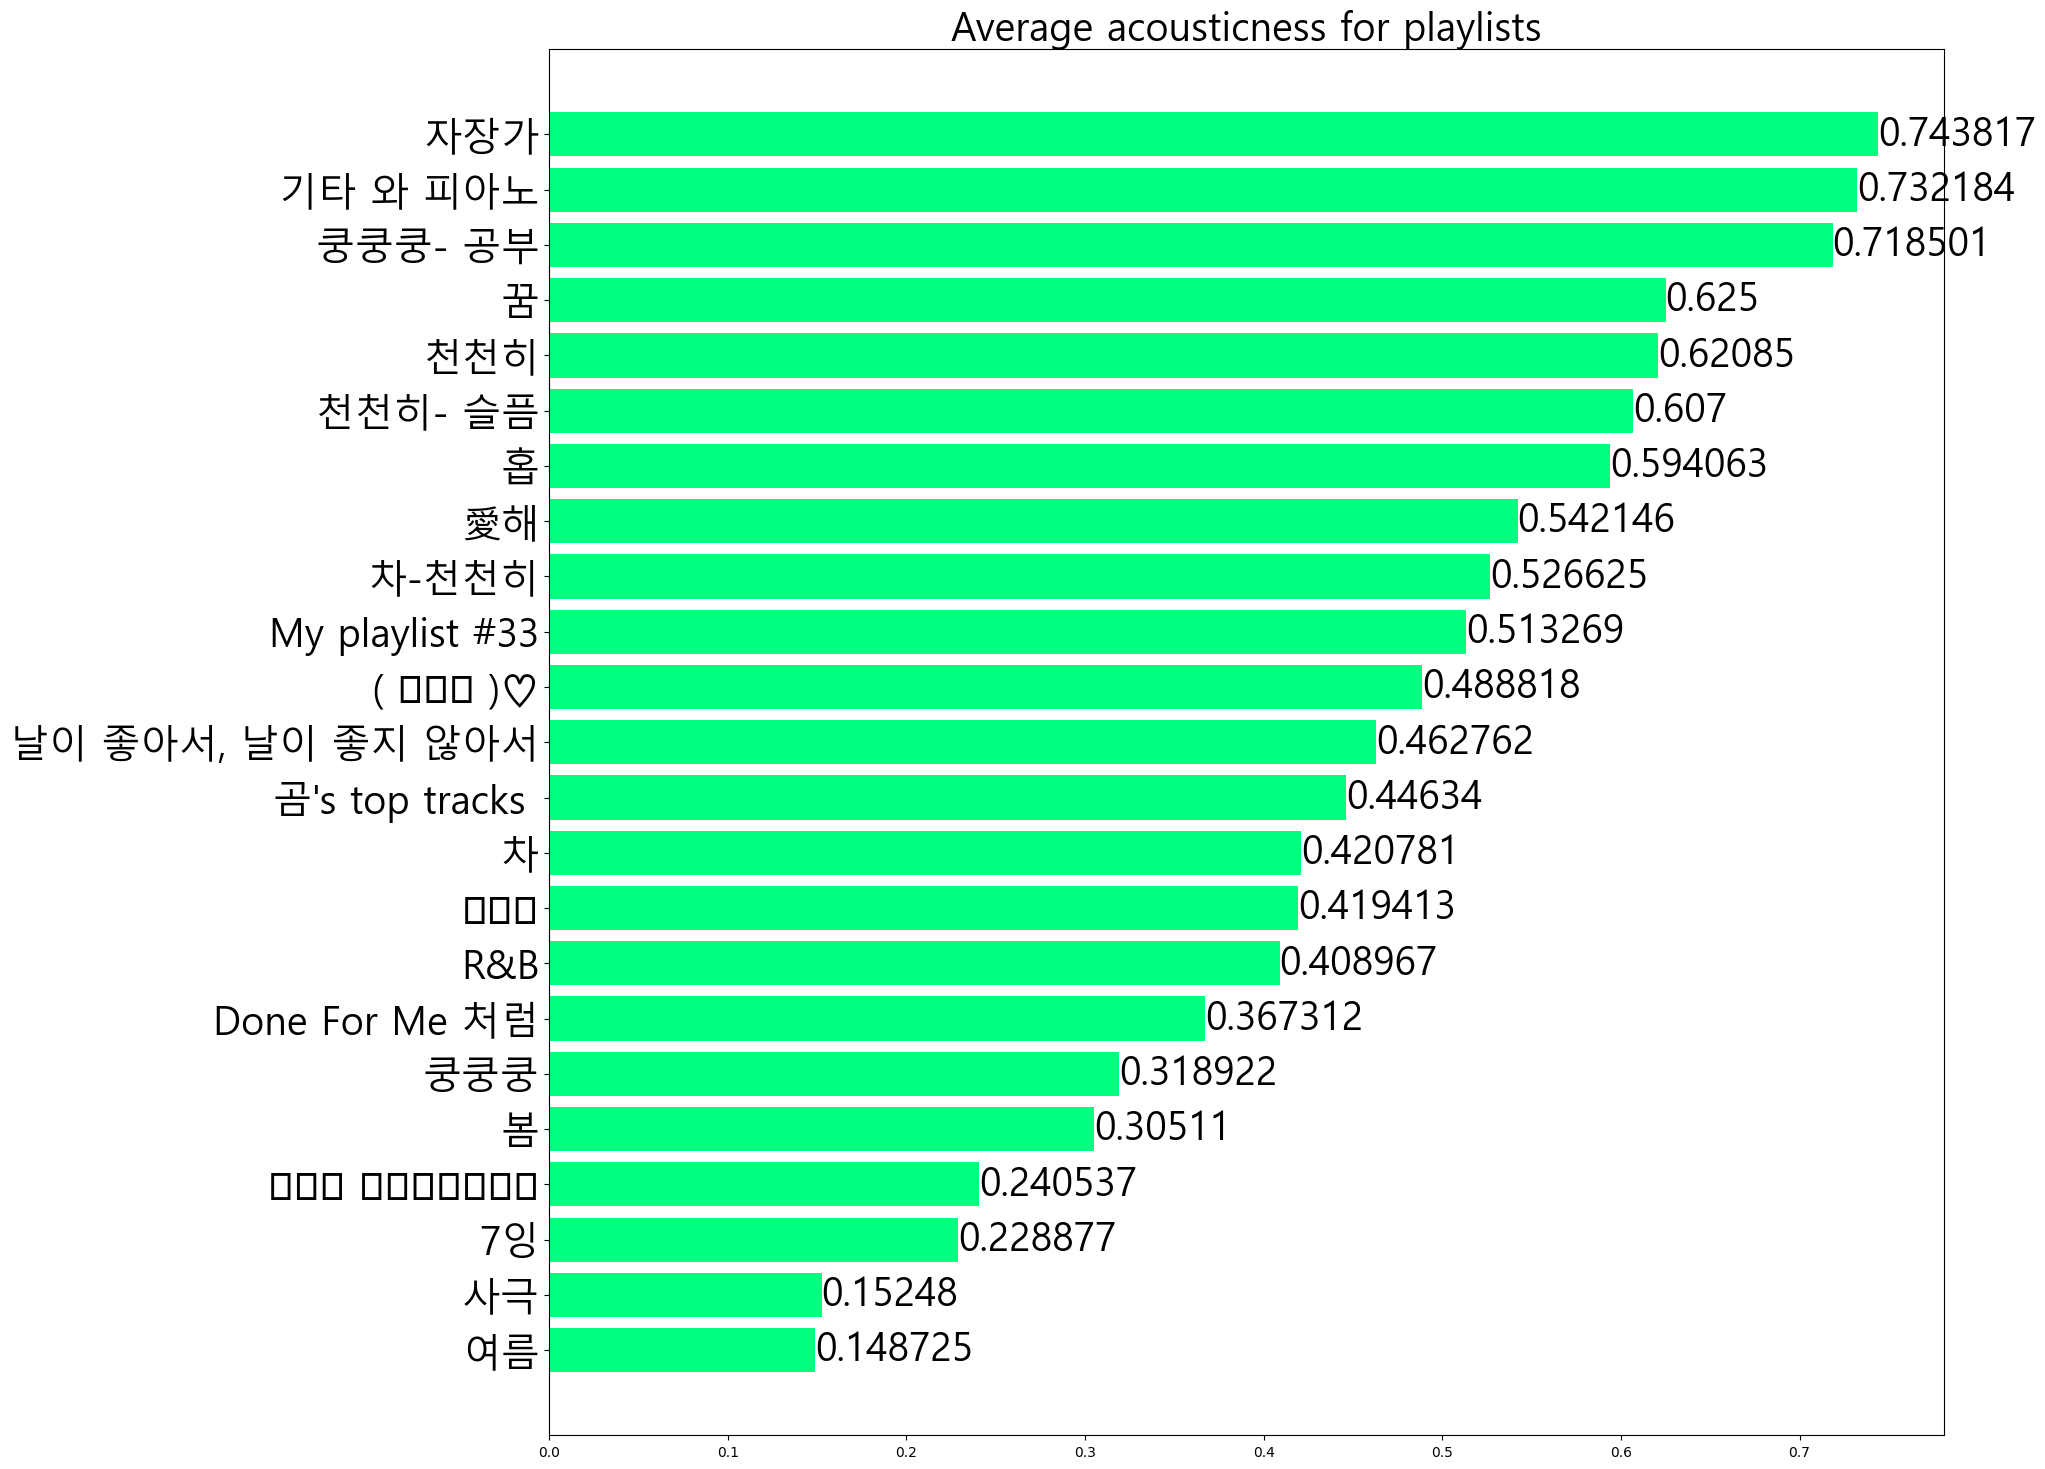

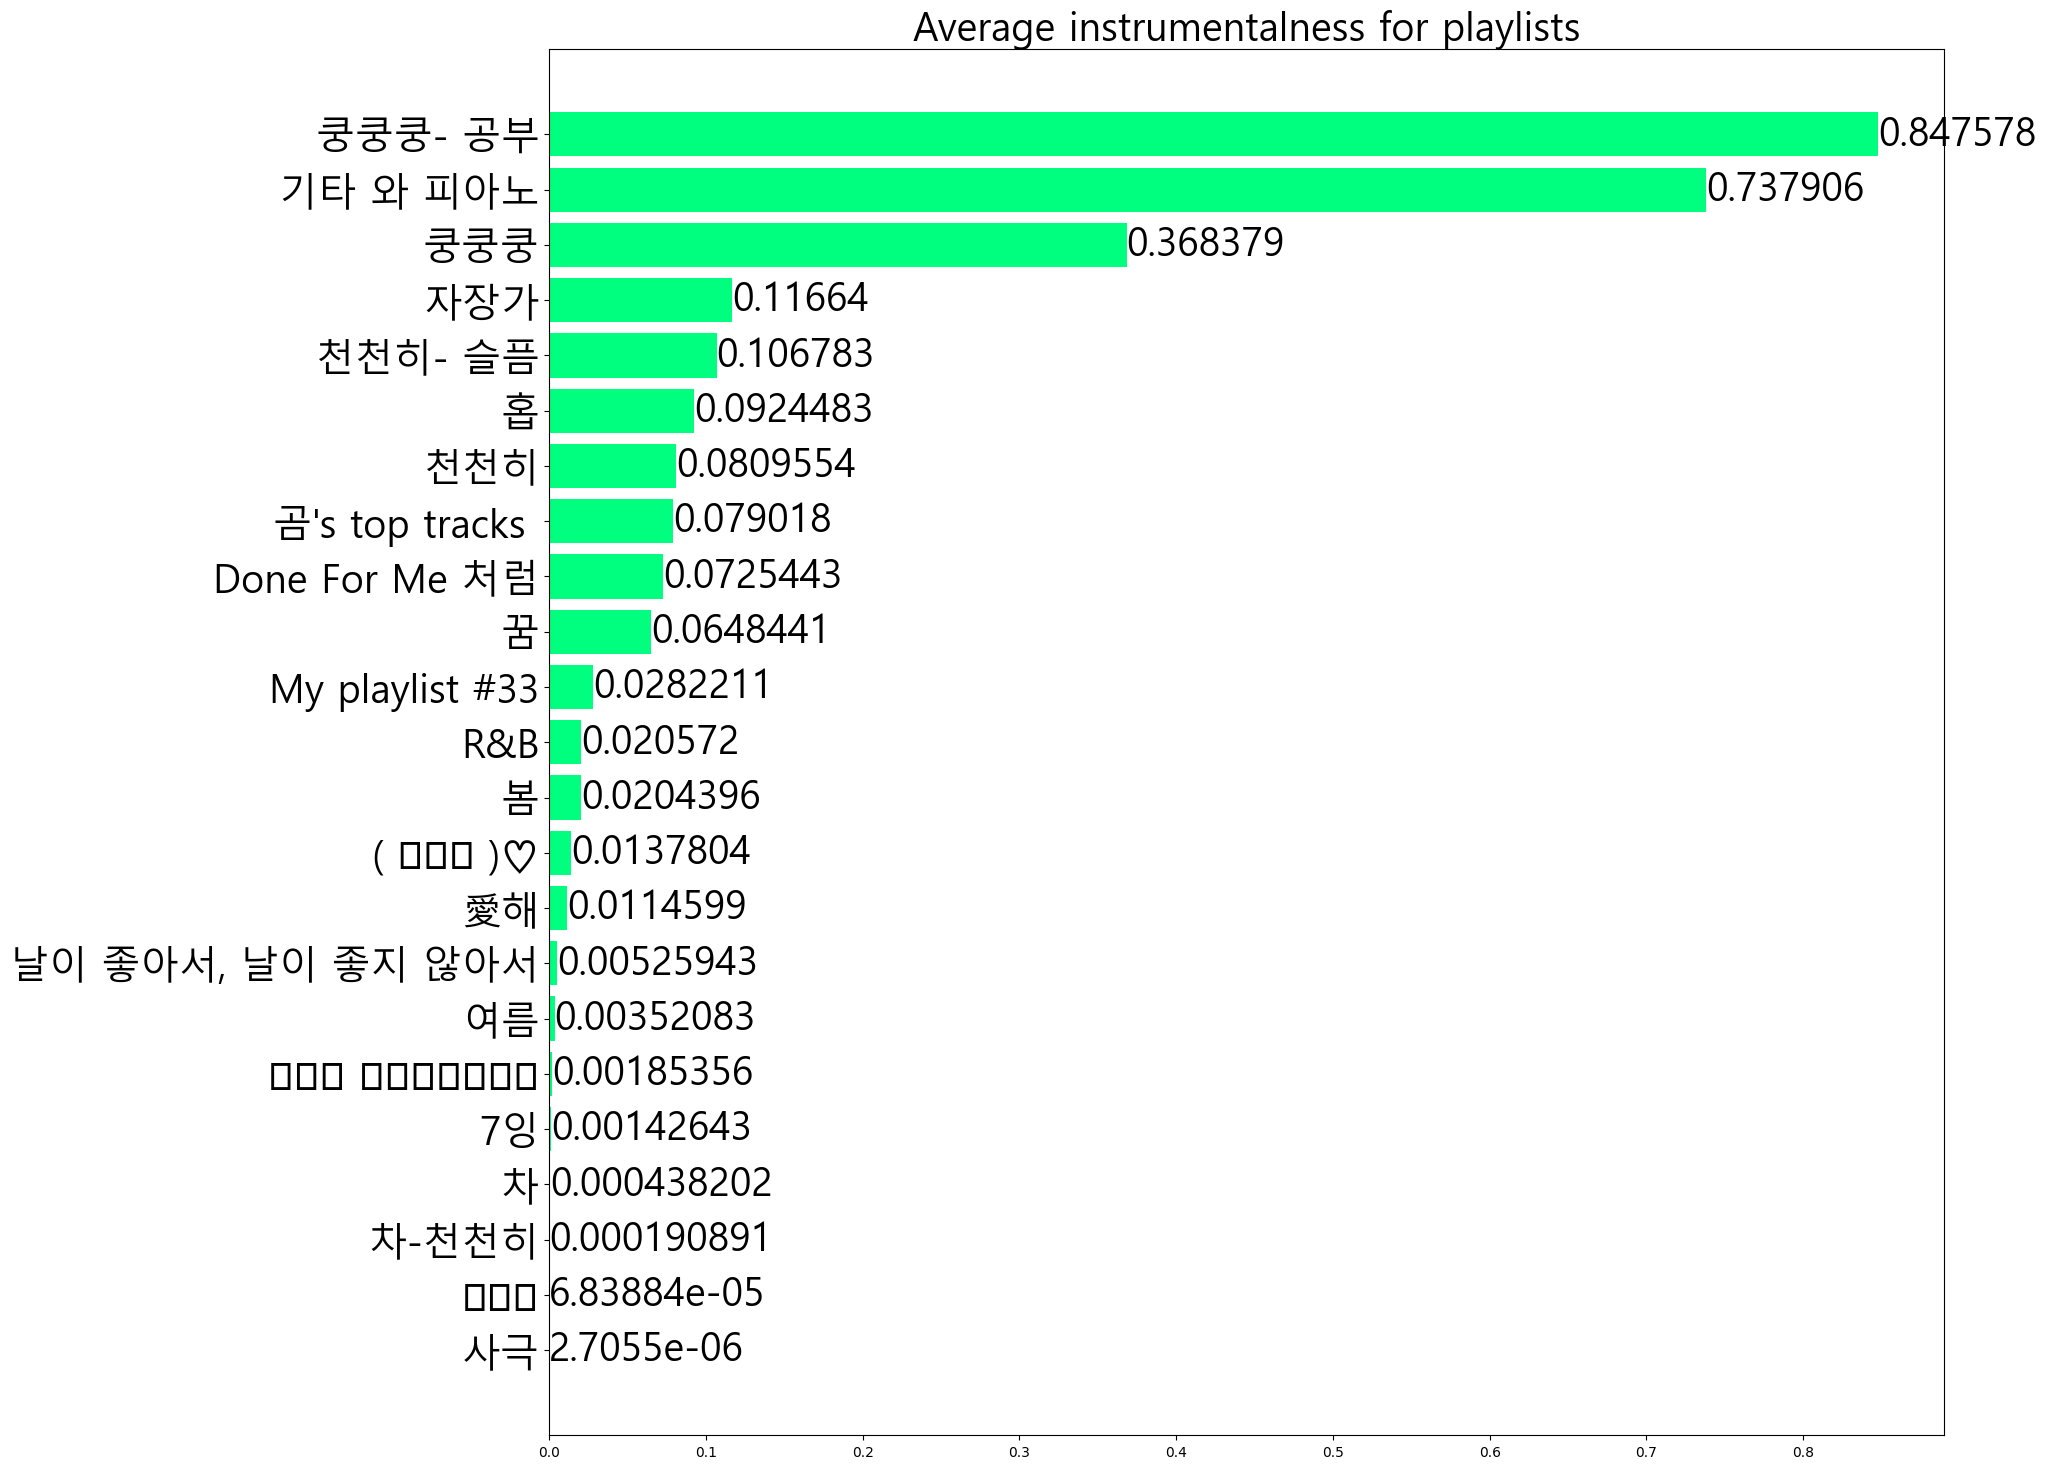

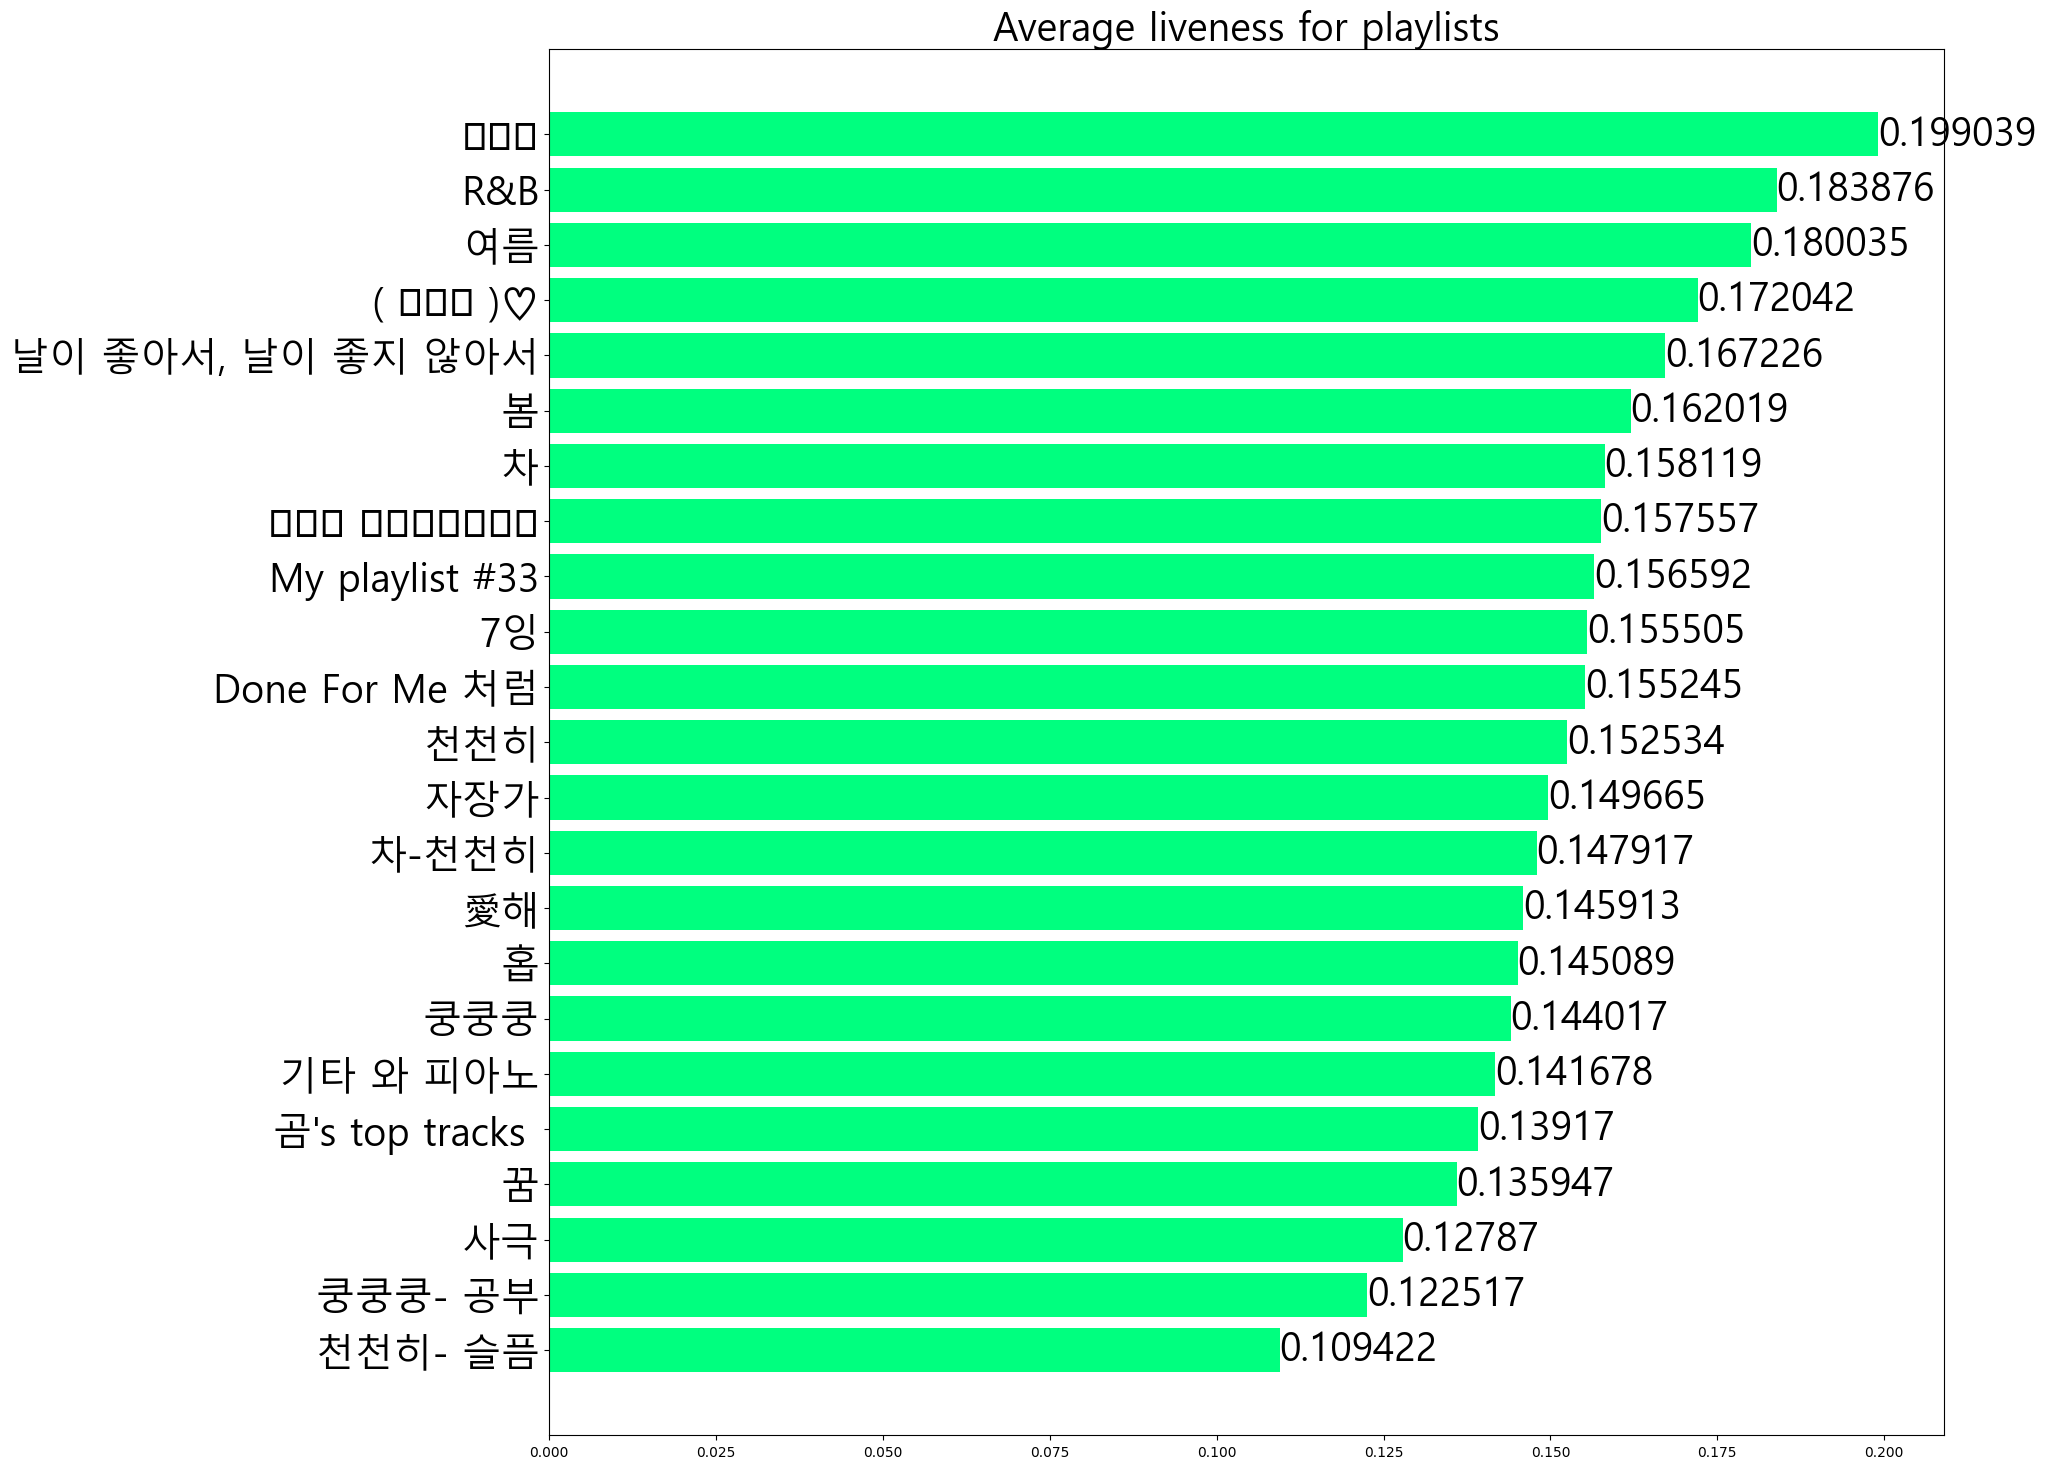

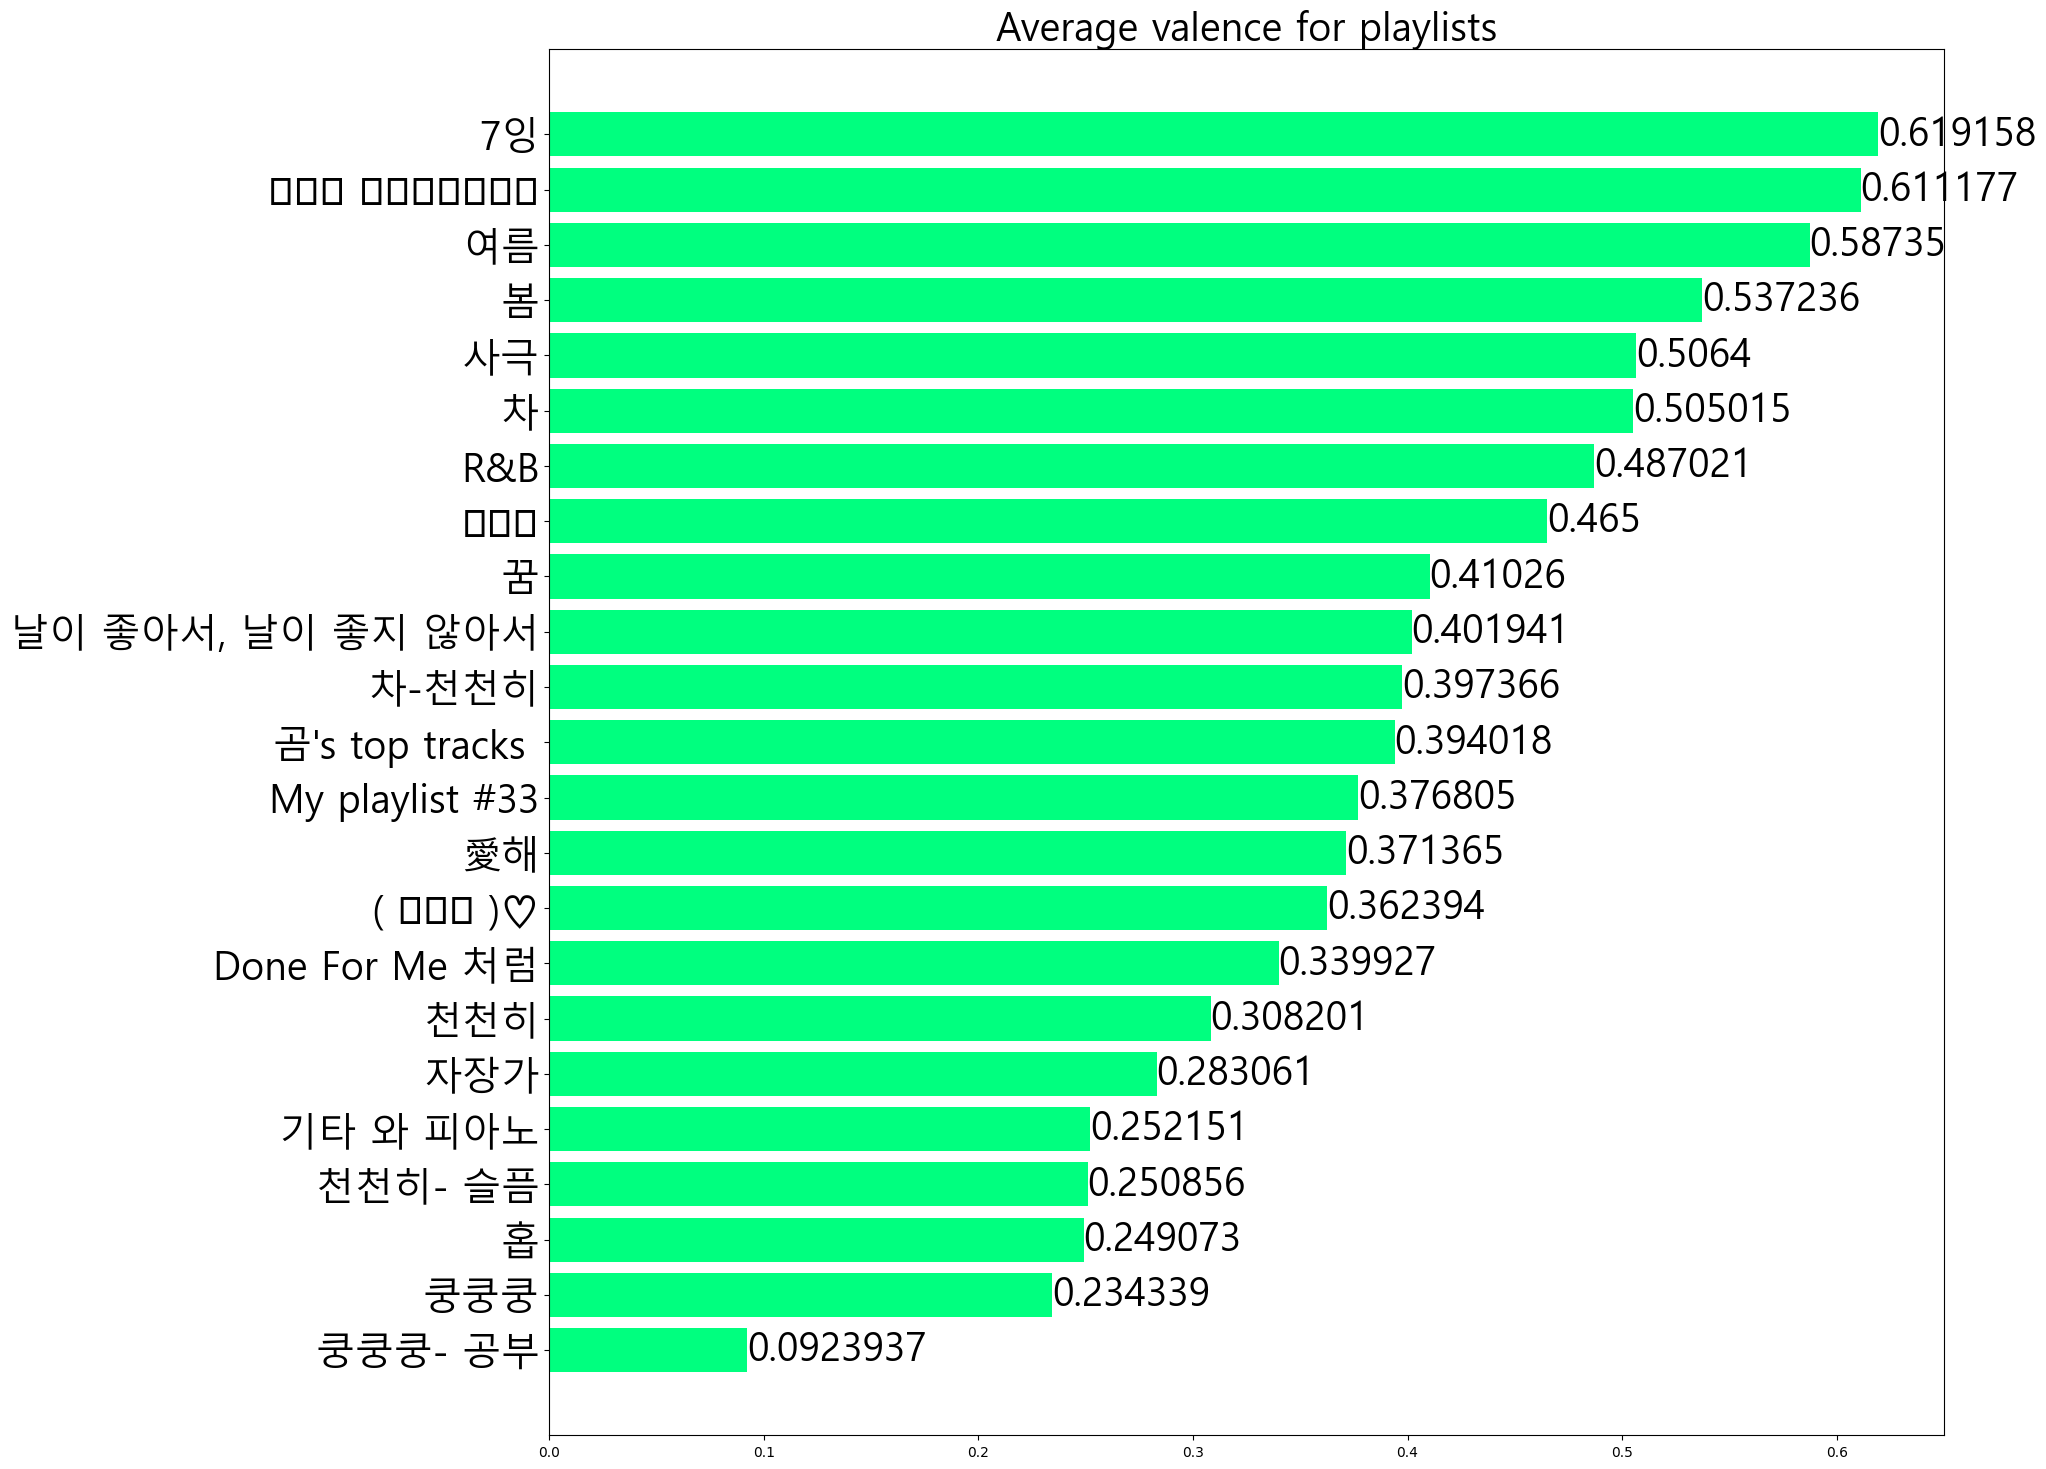

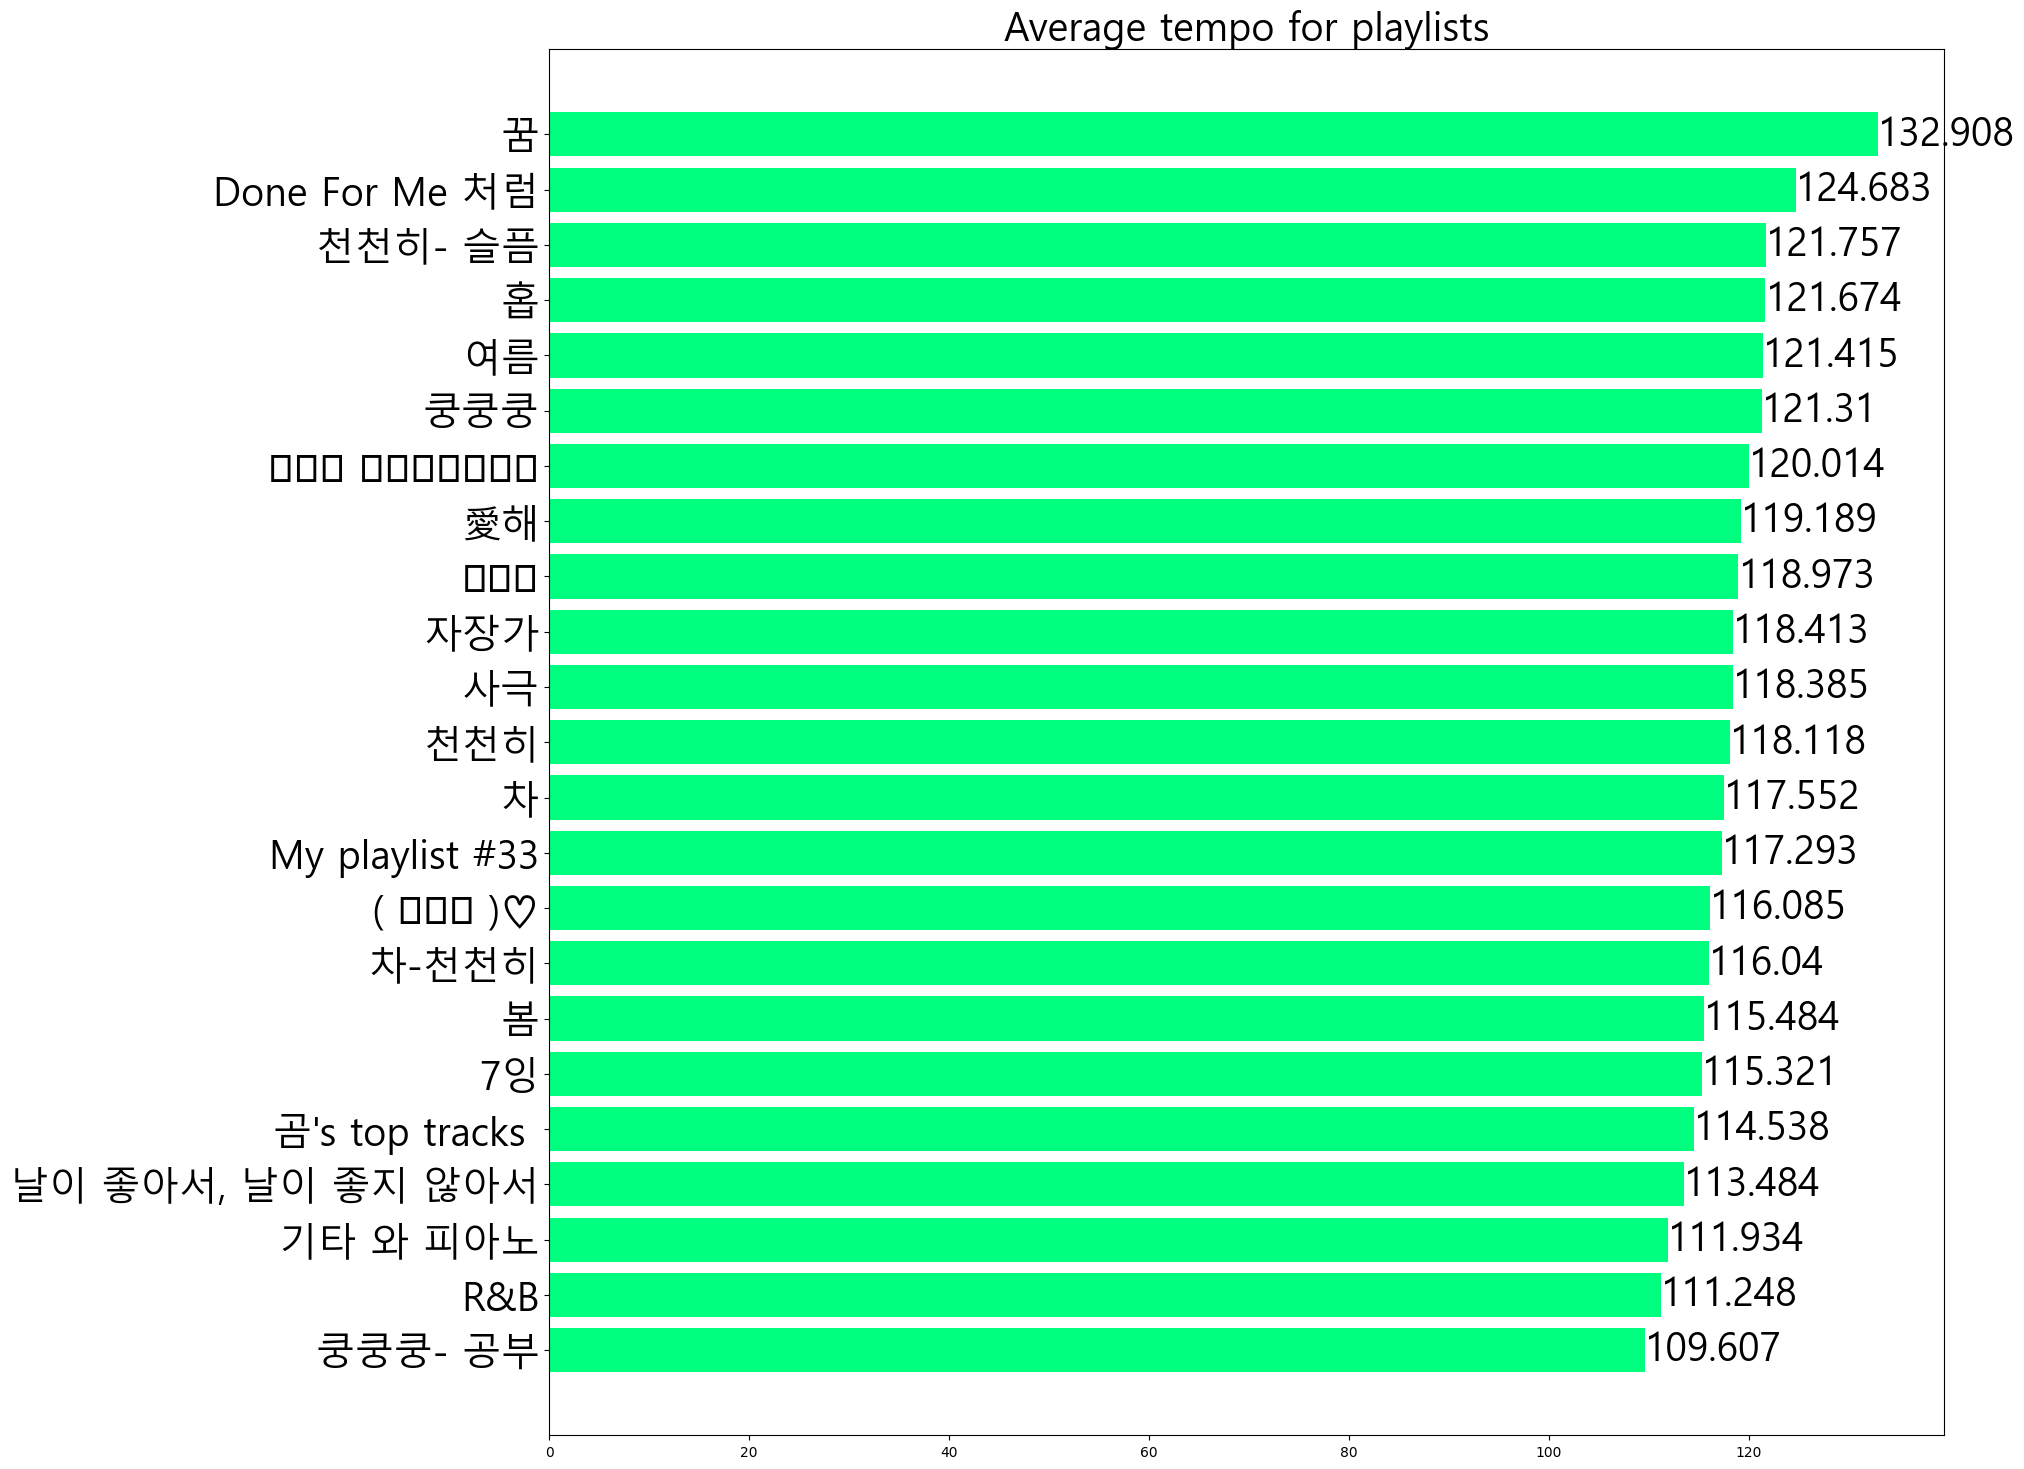

In [127]:
for feature in ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]:
    avg = {}
    for p in playlist_dict:
        avg[p] = (playlist_dict[p][feature].sum())/(len(playlist_dict[p]))
    plot(avg, f"Average {feature} for playlists")

it is too obvious that 쿵쿵쿵: 공부 is a really depressing playlist <br>
vmro, i created a depressant

In [145]:
for p in playlist_dict:
    for pp in playlist_dict:
        if p == pp:
            continue
        count = 0
        for ppp in list(playlist_dict[p].trackArtist):
            if ppp in list(playlist_dict[pp].trackArtist):
                count += 1
        print(f"intersection between {p} and {pp} has {count} songs")

intersection between 날이 좋아서, 날이 좋지 않아서 and 곰's top tracks  has 12 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 천천히- 슬픔 has 0 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 쿵쿵쿵- 공부 has 0 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and भजन has 0 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 차-천천히 has 0 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and ਯਾਰ ਅਣਮੁੱਲੇ has 0 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and My playlist #33 has 15 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 꿈 has 0 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 쿵쿵쿵 has 2 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 봄 has 20 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 홉 has 3 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 기타 와 피아노 has 1 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and Done For Me 처럼 has 1 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 愛해 has 22 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and R&B has 4 songs
intersection between 날이 좋아서, 날이 좋지 않아서 and 7잉 has 2 songs
in

intersection between My playlist #33 and 천천히 has 53 songs
intersection between My playlist #33 and 차 has 0 songs
intersection between My playlist #33 and 자장가 has 15 songs
intersection between My playlist #33 and 여름 has 13 songs
intersection between My playlist #33 and ( ◜‿◝ )♡ has 11 songs
intersection between My playlist #33 and 사극 has 0 songs
intersection between 꿈 and 날이 좋아서, 날이 좋지 않아서 has 0 songs
intersection between 꿈 and 곰's top tracks  has 0 songs
intersection between 꿈 and 천천히- 슬픔 has 0 songs
intersection between 꿈 and 쿵쿵쿵- 공부 has 0 songs
intersection between 꿈 and भजन has 0 songs
intersection between 꿈 and 차-천천히 has 0 songs
intersection between 꿈 and ਯਾਰ ਅਣਮੁੱਲੇ has 0 songs
intersection between 꿈 and My playlist #33 has 1 songs
intersection between 꿈 and 쿵쿵쿵 has 2 songs
intersection between 꿈 and 봄 has 9 songs
intersection between 꿈 and 홉 has 0 songs
intersection between 꿈 and 기타 와 피아노 has 1 songs
intersection between 꿈 and Done For Me 처럼 has 1 songs
intersection between 꿈 and

intersection between 천천히 and 꿈 has 9 songs
intersection between 천천히 and 쿵쿵쿵 has 25 songs
intersection between 천천히 and 봄 has 112 songs
intersection between 천천히 and 홉 has 75 songs
intersection between 천천히 and 기타 와 피아노 has 36 songs
intersection between 천천히 and Done For Me 처럼 has 33 songs
intersection between 천천히 and 愛해 has 270 songs
intersection between 천천히 and R&B has 27 songs
intersection between 천천히 and 7잉 has 3 songs
intersection between 천천히 and 차 has 5 songs
intersection between 천천히 and 자장가 has 90 songs
intersection between 천천히 and 여름 has 1 songs
intersection between 천천히 and ( ◜‿◝ )♡ has 51 songs
intersection between 천천히 and 사극 has 0 songs
intersection between 차 and 날이 좋아서, 날이 좋지 않아서 has 0 songs
intersection between 차 and 곰's top tracks  has 1 songs
intersection between 차 and 천천히- 슬픔 has 3 songs
intersection between 차 and 쿵쿵쿵- 공부 has 0 songs
intersection between 차 and भजन has 2 songs
intersection between 차 and 차-천천히 has 68 songs
intersection between 차 and ਯਾਰ ਅਣਮੁੱਲੇ has 36 songs
int